# Telecom Customer Churn Prediction

The goal of this project is to analyze customer demographics, services, tenure, and other variables to predict whether a customer will churn (leave the company) or not.

## Data Dictionary

| Variable         | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| CustomerID       | Unique customer ID                                                          |
| Gender           | Customer's gender                                                           |
| SeniorCitizen    | Whether the customer is a senior citizen (1 = Yes, 0 = No)                  |
| Partner          | Whether the customer has a partner (Yes, No)                                |
| Dependents       | Whether the customer has dependents (Yes, No)                               |
| Tenure           | Number of months the customer has stayed with the company                   |
| PhoneService     | Whether the customer has a phone service (Yes, No)                          |
| MultipleLines    | Whether the customer has multiple lines (Yes, No, No phone service)         |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)                 |
| OnlineSecurity   | Whether the customer has online security (Yes, No, No internet service)     |
| OnlineBackup     | Whether the customer has online backup (Yes, No, No internet service)       |
| DeviceProtection | Whether the customer has device protection (Yes, No, No internet service)   |
| TechSupport      | Whether the customer has tech support (Yes, No, No internet service)        |
| StreamingTV      | Whether the customer has streaming TV (Yes, No, No internet service)        |
| StreamingMovies  | Whether the customer has streaming movies (Yes, No, No internet service)    |
| Contract         | The contract term (Month-to-month, One year, Two year)                      |
| PaperlessBilling | Whether the customer has paperless billing (Yes, No)                        |
| PaymentMethod    | Customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) |
| MonthlyCharges   | Amount charged to the customer monthly                                      |
| TotalCharges     | Total amount charged to the customer                                        |
| Churn            | Whether the customer churned (Yes or No)                                    |

#### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [4]:
df = pd.read_csv('Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Data Preprocessing 

In [5]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [6]:
#Checking the datatypes of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Type casting column Total Charges

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
#Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Droping the null values
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Removing the customerID column
df.drop(columns='customerID', inplace=True)

In [13]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(22)

In [14]:
#Removing the duplicate values
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
#checking number of unique values in each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
columns = df.columns
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
#Checking the unique values in each column
for i in columns:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

#### Descriptive Statistics

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Exploratory Data Analysis (EDA)

In this section, we visualize and explore the data to identify patterns, trends, and relationships between features and the target variable (Churn).

### Customer Demographics

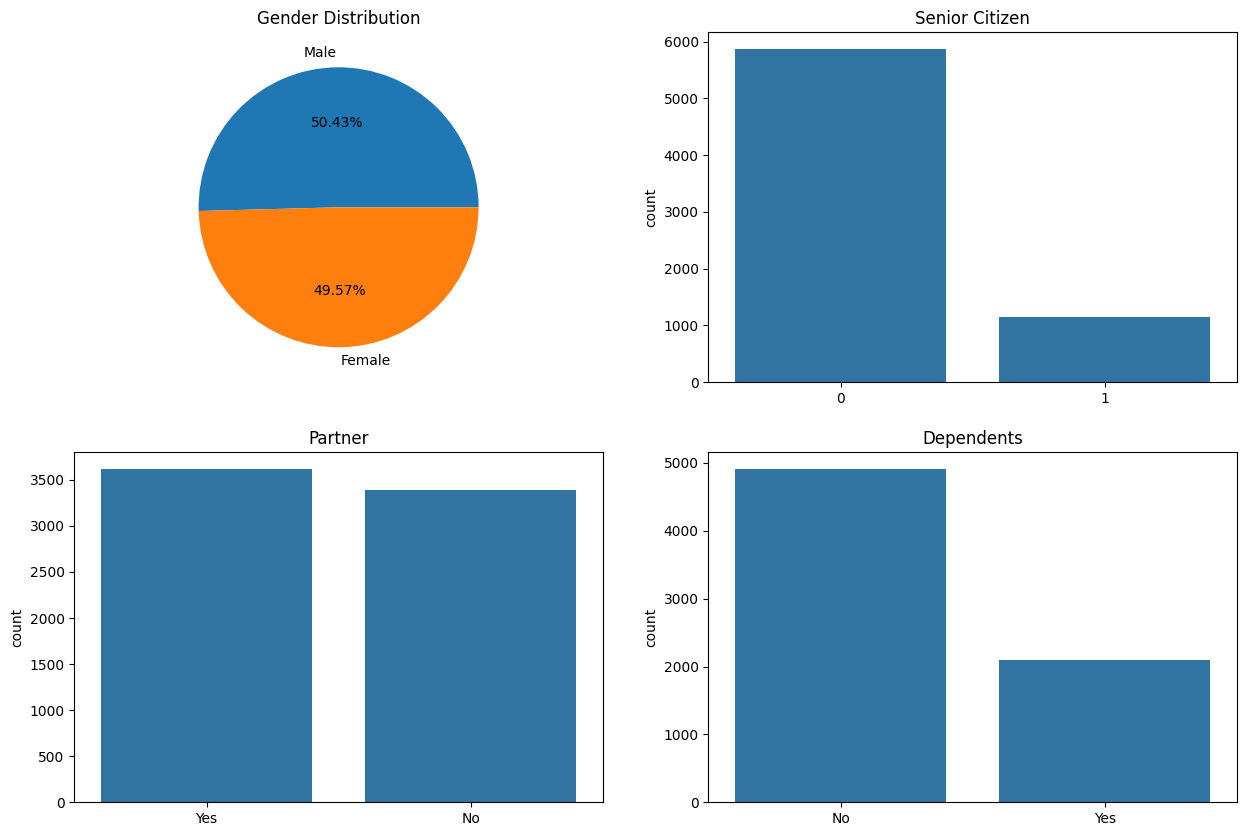

In [21]:
plt.figure(figsize=(15,10))

#Gender Distribution
plt.subplot(2, 2, 1)
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%')
plt.title('Gender Distribution')

#Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique()).set_title('Senior Citizen')

#Partner Distribution
plt.subplot(2, 2, 3)
sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique()).set_title('Partner')

#Dependents Distribution
plt.subplot(2, 2, 4)
sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique()).set_title('Dependents')


plt.show()

**Customer Demographics Visualization**

- The gender distribution is nearly equal.
- Most customers are not senior citizens.
- The number of customers with and without partners is similar.
- Most customers do not have dependents.

These insights help us understand the basic profile of the customer base.

## Services

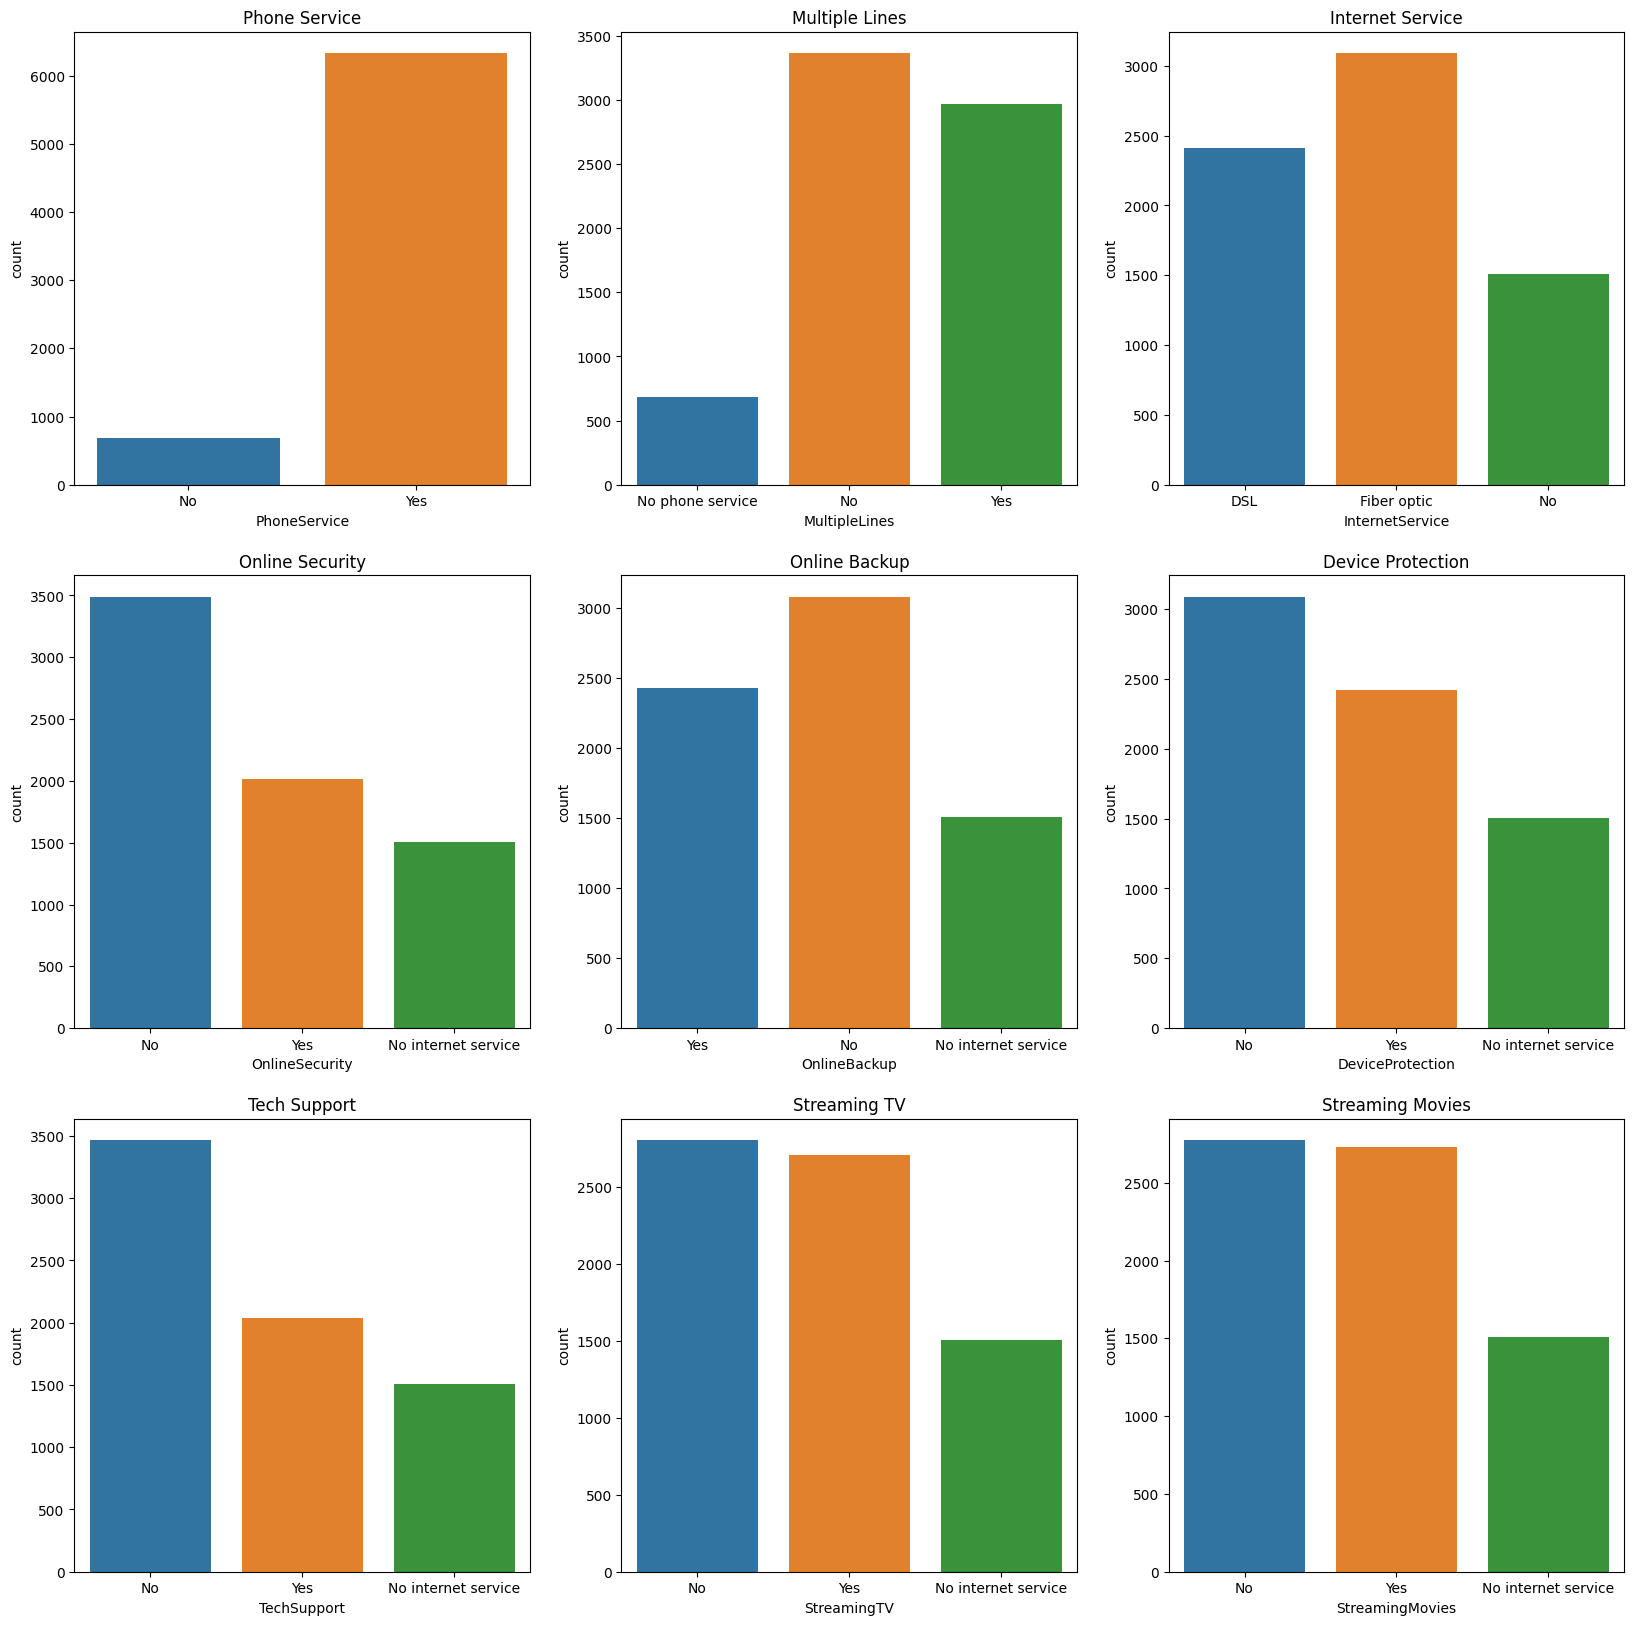

In [22]:
plt.figure(figsize=(20, 20))

#phone service
plt.subplot(3,3,1)
sns.countplot(x=df['PhoneService'],hue=df['PhoneService']).set_title("Phone Service")

#Multiple Lines
plt.subplot(3,3,2)
sns.countplot(x=df['MultipleLines'],hue=df['MultipleLines']).set_title("Multiple Lines")

#Internet Service
plt.subplot(3,3,3)
sns.countplot(x=df['InternetService'],hue=df['InternetService']).set_title("Internet Service")

#Online Security
plt.subplot(3,3,4)
sns.countplot(x=df['OnlineSecurity'],hue=df['OnlineSecurity']).set_title("Online Security")

#Online Backup
plt.subplot(3,3,5)
sns.countplot(x=df['OnlineBackup'],hue=df['OnlineBackup']).set_title("Online Backup")

#Device Protection
plt.subplot(3,3,6)
sns.countplot(x=df['DeviceProtection'],hue=df['DeviceProtection']).set_title("Device Protection")

#Tech Support
plt.subplot(3,3,7)
sns.countplot(x=df['TechSupport'],hue=df['TechSupport']).set_title("Tech Support")

#Streaming TV
plt.subplot(3,3,8)
sns.countplot(x=df['StreamingTV'],hue=df['StreamingTV']).set_title("Streaming TV")

#Streaming Movies
plt.subplot(3,3,9)
sns.countplot(x=df['StreamingMovies'],hue=df['StreamingMovies']).set_title("Streaming Movies")

plt.show()

**Service Subscription Insights**

- Most customers have phone service.
- About half have multiple lines.
- Internet service is popular, with many choosing fiber optic.
- Online backup and device protection are moderately popular.
- Streaming services are among the most opted services.

Understanding service preferences helps identify which offerings are most valued by customers.

### Tenure and Contract

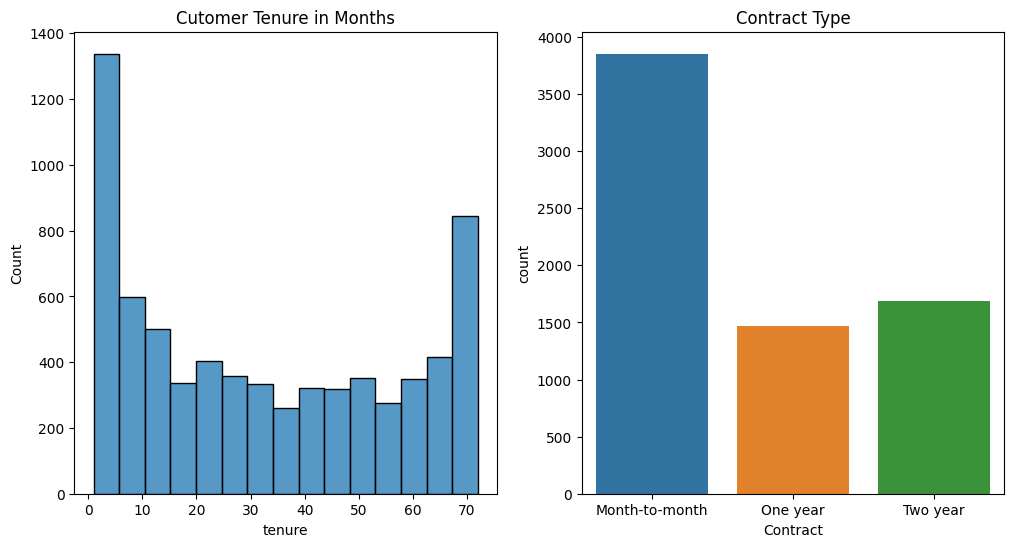

In [23]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x = 'tenure', data = df).set_title('Cutomer Tenure in Months')

plt.subplot(1,2,2)
sns.countplot(x = 'Contract', data = df,hue='Contract').set_title('Contract Type')

plt.show()

**Tenure and Contract Insights**

- Most customers have a short tenure (less than a year) with the company.
- The majority of customers are on month-to-month contracts.
- A significant number of loyal customers have a tenure close to 70 months.
- Two-year contracts are the next most popular after month-to-month.

This analysis helps us understand customer loyalty and contract preferences.

### Billing and Charges

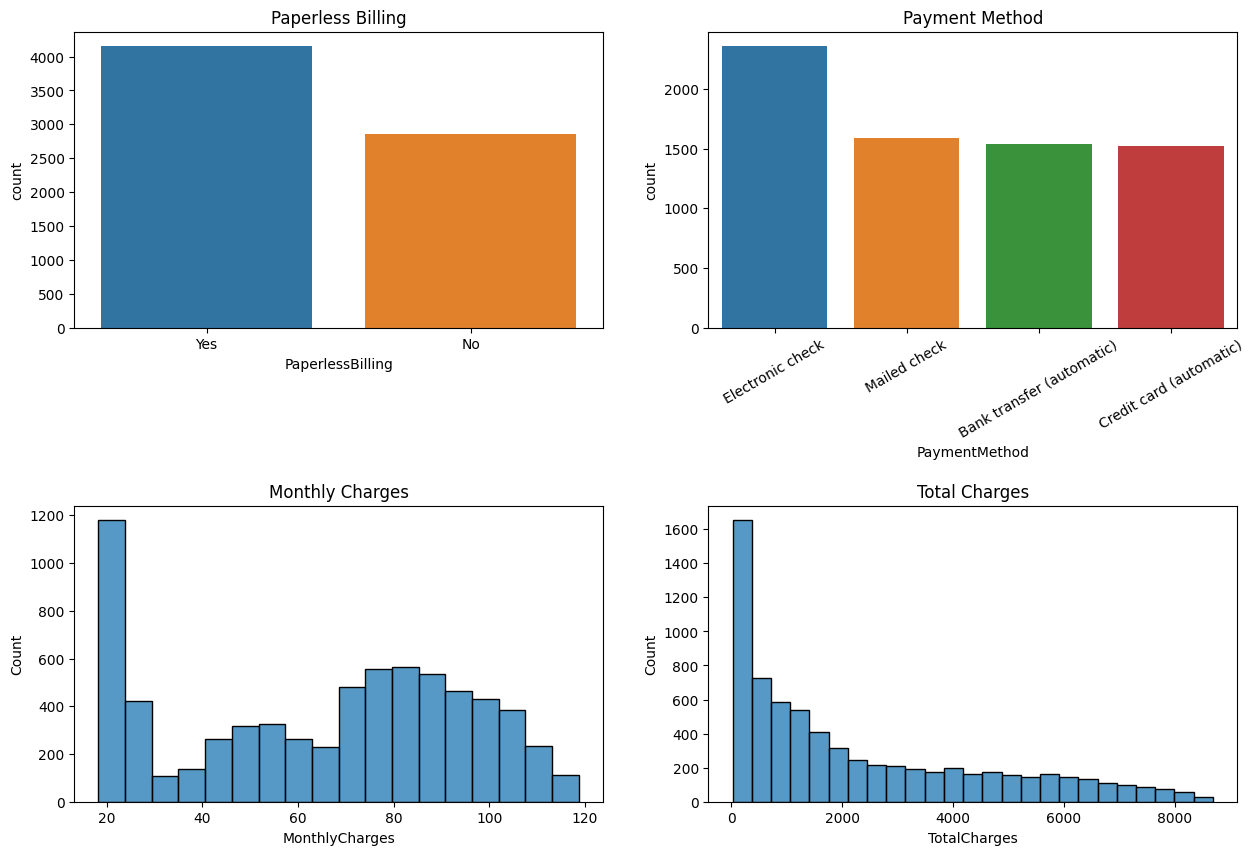

In [24]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.6)

#papaerless billing
plt.subplot(2,2,1)
sns.countplot(x = df['PaperlessBilling'],hue=df['PaperlessBilling']).set_title('Paperless Billing')

#Payment Method
plt.subplot(2,2,2)
sns.countplot(x = df['PaymentMethod'],hue=df['PaymentMethod']).set_title('Payment Method')
plt.xticks(rotation=30)

#Monthly Charges
plt.subplot(2,2,3)
sns.histplot(x=df['MonthlyCharges']).set_title("Monthly Charges")

#Total Charges
plt.subplot(2,2,4)
sns.histplot(x=df['TotalCharges']).set_title("Total Charges")

plt.show()

**Billing and Charges Insights**

- Most customers prefer paperless billing, but a significant number still use paper bills.
- Electronic check is the most common payment method, followed by mailed checks, bank transfers, and credit cards.
- Many customers pay around $20 per month, but some pay much higher monthly charges.
- Most customers have total charges below $2000, but a few have much higher totals, likely due to long tenure or multiple services.

Understanding billing and payment preferences can help the company tailor its offerings and improve customer satisfaction.

### Churn Count

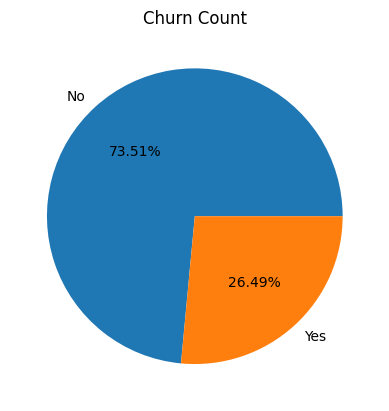

In [25]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')
plt.show()

**Churn Rate Insights**

- Only about 26% of customers have churned, while the majority have stayed.
- This indicates that the company is relatively successful at retaining its customers.

Monitoring churn rate is crucial for business growth and customer retention strategies.In the dataset, the number of churning customers is very less as compared to non churning. Only 26.49% churnned from the telecom company. This could be a potential proof, that company is quite good at retaning its customers.

---

## Analyzing Churn by Customer Characteristics

Now, let's explore how different customer characteristics relate to churn.

### Customer Demogrpahics and Churn

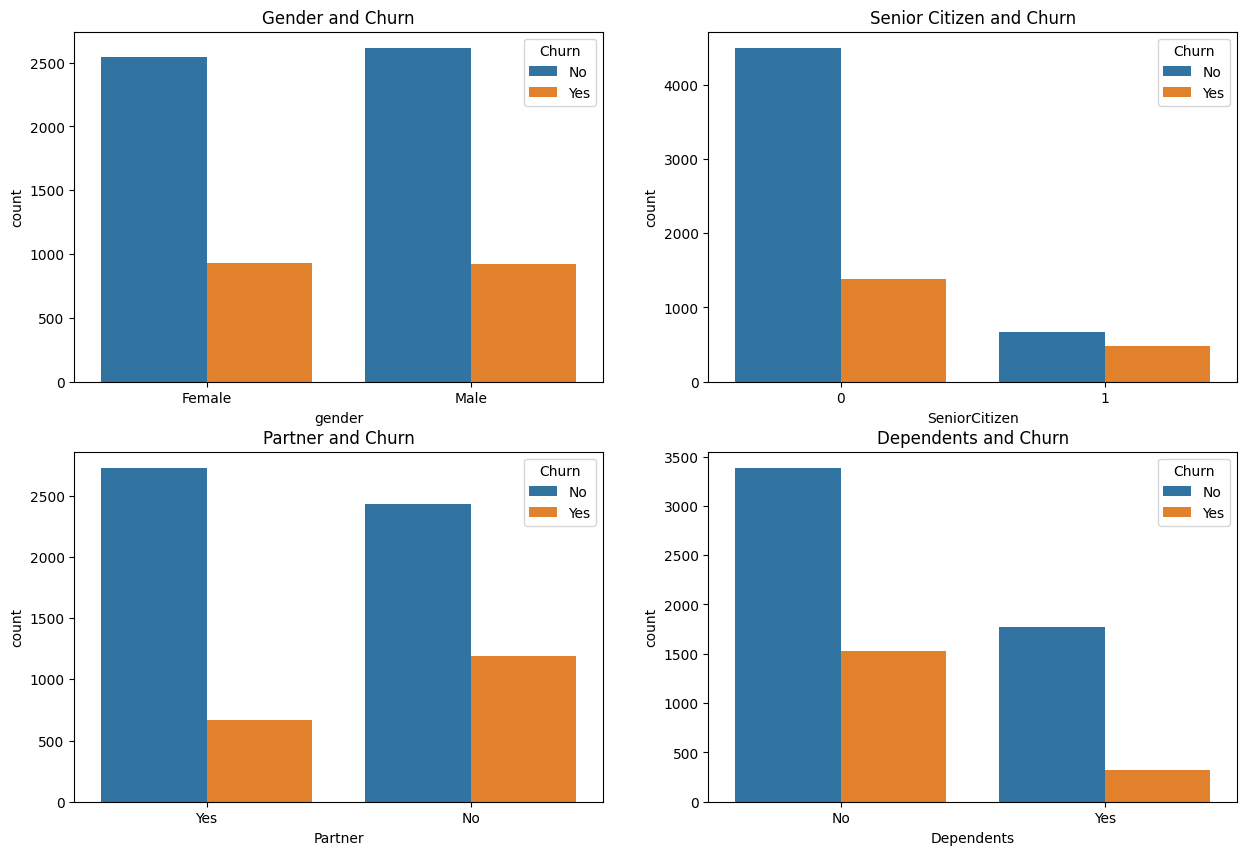

In [26]:
plt.figure(figsize=(15,10))

#Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(x=df['gender'],hue=df['Churn']).set_title("Gender and Churn")

#Senior Citizen Distribution
plt.subplot(2, 2, 2)
sns.countplot(x=df['SeniorCitizen'],hue=df['Churn']).set_title("Senior Citizen and Churn")

#Partner Distribution
plt.subplot(2, 2, 3)
sns.countplot(x=df['Partner'],hue=df['Churn']).set_title("Partner and Churn")

#Dependents Distribution
plt.subplot(2, 2, 4)
sns.countplot(x=df['Dependents'],hue=df['Churn']).set_title("Dependents and Churn")

plt.show()

**Churn by Demographics**

- Churn rates are similar for both genders.
- Senior citizens have a slightly lower churn rate than non-senior citizens.
- Customers without partners or dependents are more likely to churn.

This suggests that single customers or those without dependents may be at higher risk of leaving.

### Services and Churn

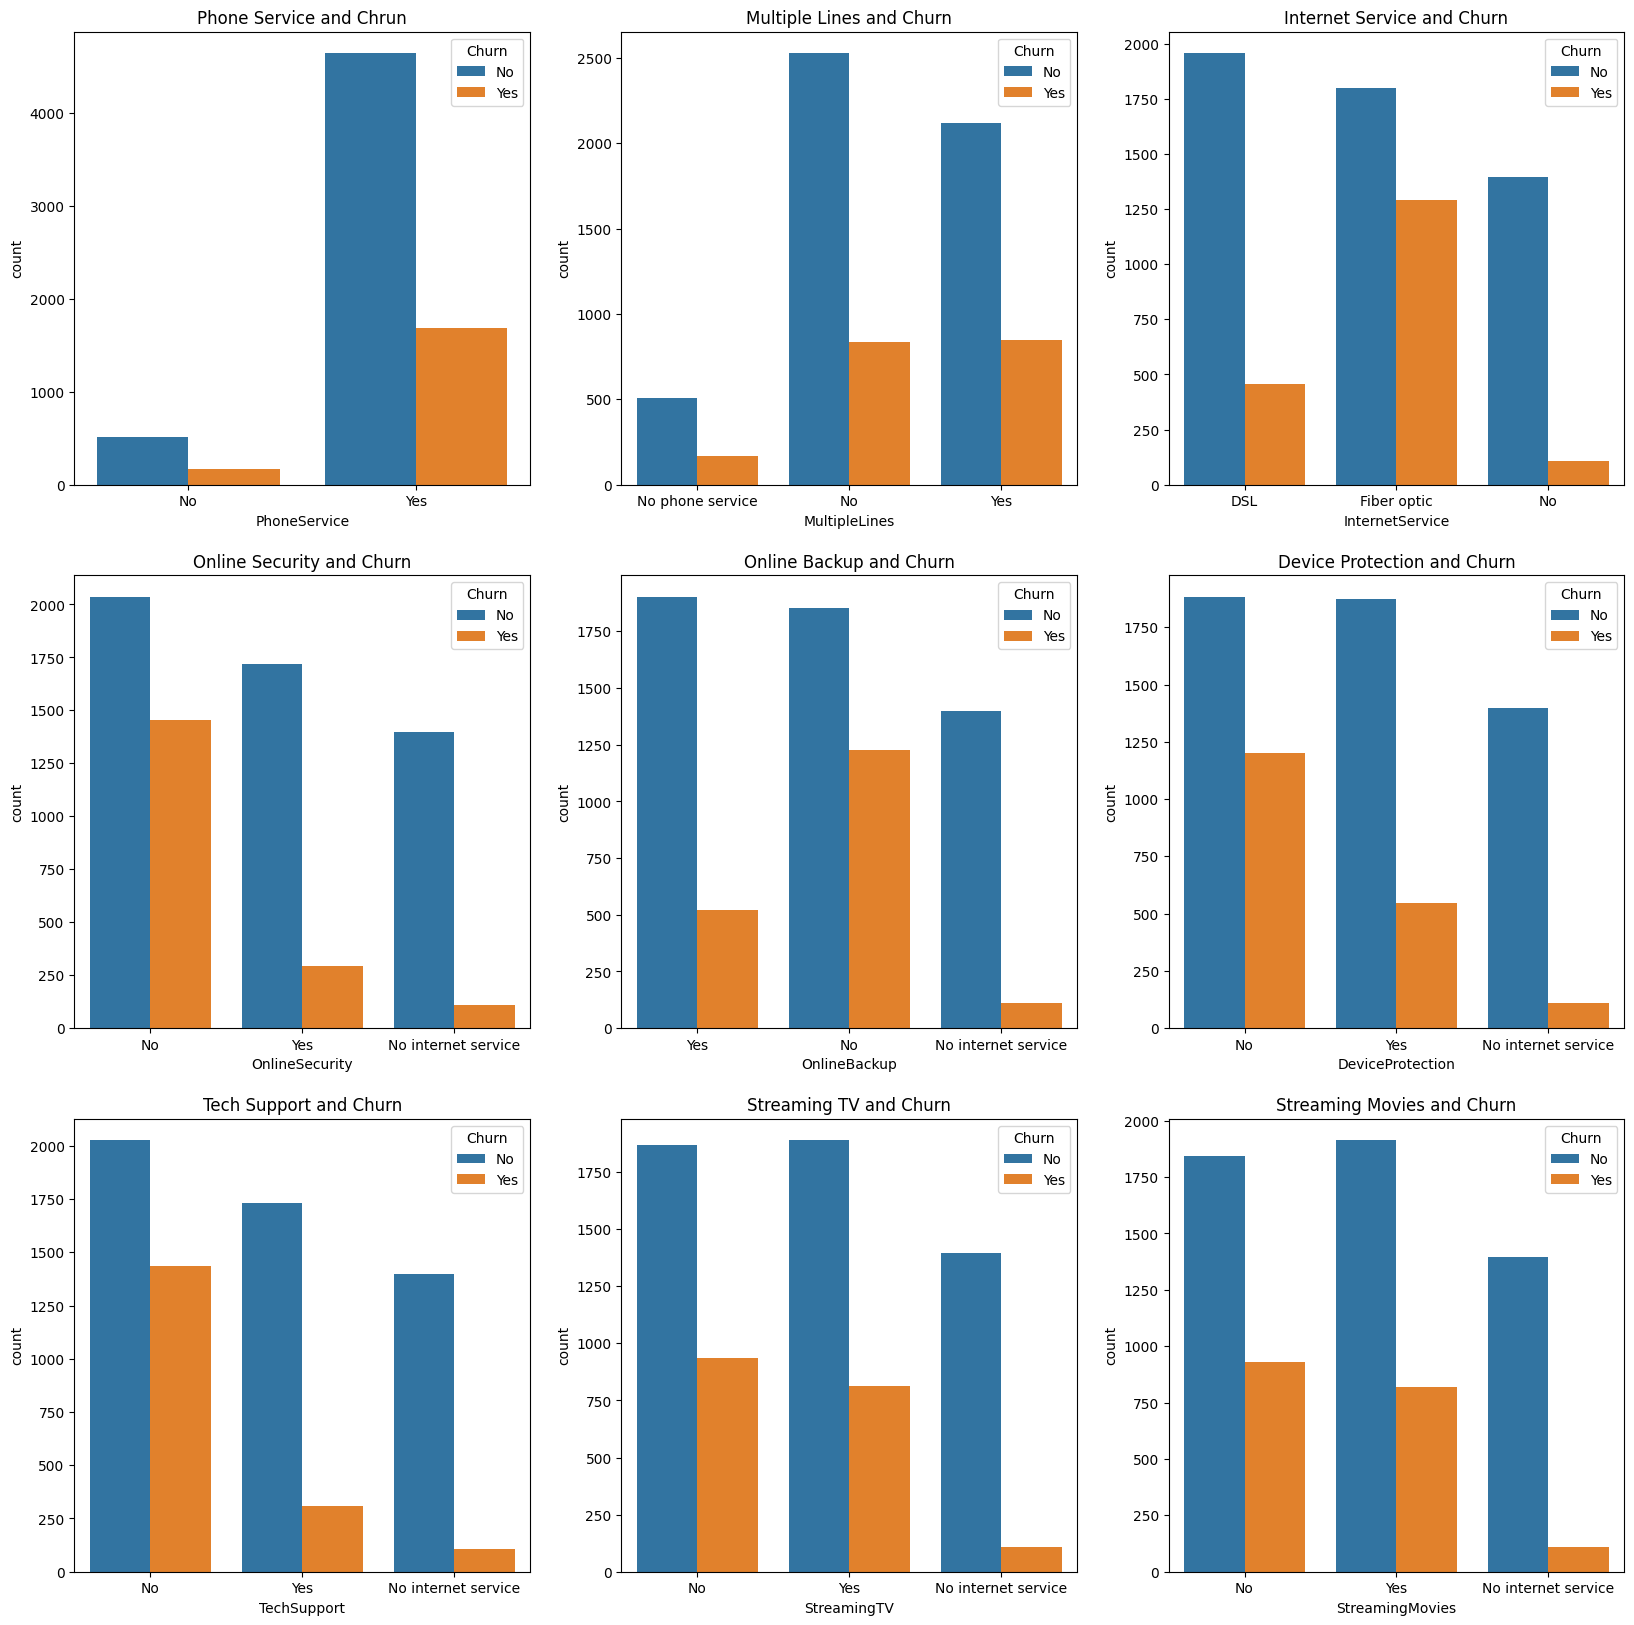

In [27]:
plt.figure(figsize=(20, 20))

#phone service
plt.subplot(3,3,1)
sns.countplot(x=df['PhoneService'],hue=df['Churn']).set_title("Phone Service and Chrun")

#Multiple Lines
plt.subplot(3,3,2)
sns.countplot(x=df['MultipleLines'],hue=df['Churn']).set_title("Multiple Lines and Churn")

#Internet Service
plt.subplot(3,3,3)
sns.countplot(x=df['InternetService'],hue=df['Churn']).set_title("Internet Service and Churn")

#Online Security
plt.subplot(3,3,4)
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn']).set_title("Online Security and Churn")

#Online Backup
plt.subplot(3,3,5)
sns.countplot(x=df['OnlineBackup'],hue=df['Churn']).set_title("Online Backup and Churn")

#Device Protection
plt.subplot(3,3,6)
sns.countplot(x=df['DeviceProtection'],hue=df['Churn']).set_title("Device Protection and Churn")

#Tech Support
plt.subplot(3,3,7)
sns.countplot(x=df['TechSupport'],hue=df['Churn']).set_title("Tech Support and Churn")

#Streaming TV
plt.subplot(3,3,8)
sns.countplot(x=df['StreamingTV'],hue=df['Churn']).set_title("Streaming TV and Churn")

#Streaming Movies
plt.subplot(3,3,9)
sns.countplot(x=df['StreamingMovies'],hue=df['Churn']).set_title("Streaming Movies and Churn")

plt.show()

**Churn by Service Usage**

- Customers with multiple lines have a higher churn rate.
- Not subscribing to online backup or device protection is associated with higher churn.
- Customers who use streaming services are less likely to churn.

Offering value-added services may help reduce churn.

### Tenure/Contract and Churn

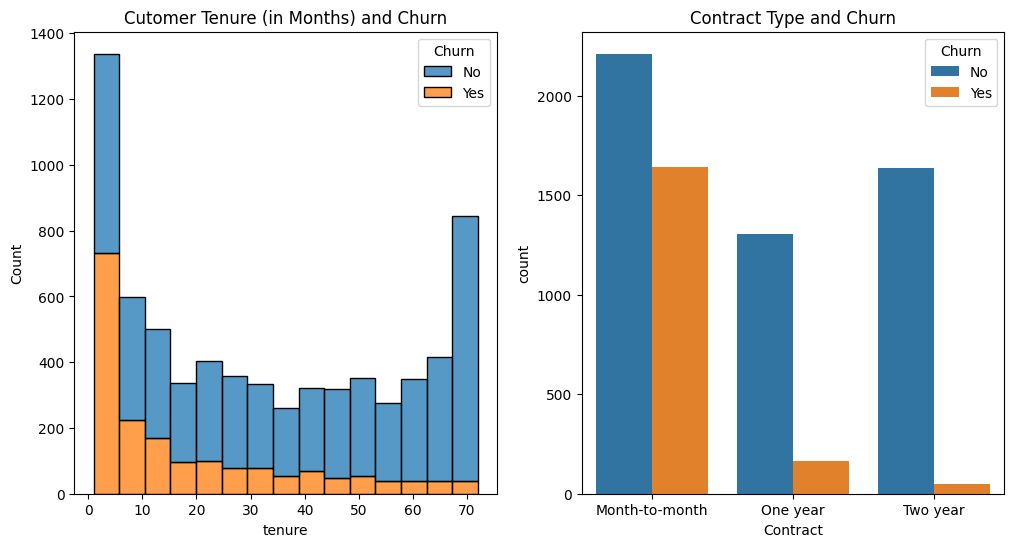

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(x = 'tenure', data = df, hue='Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn') 

plt.subplot(1,2,2)
sns.countplot(x = 'Contract', data = df,hue='Churn').set_title('Contract Type and Churn')

plt.show()

**Churn by Tenure and Contract**

- Customers with shorter tenure (less than 5 months) have a higher churn rate.
- Churn rate decreases as tenure increases.
- Month-to-month contracts are associated with higher churn compared to one-year or two-year contracts.

Longer contracts and customer loyalty are linked to lower churn.

### Billing/Charges and Churn

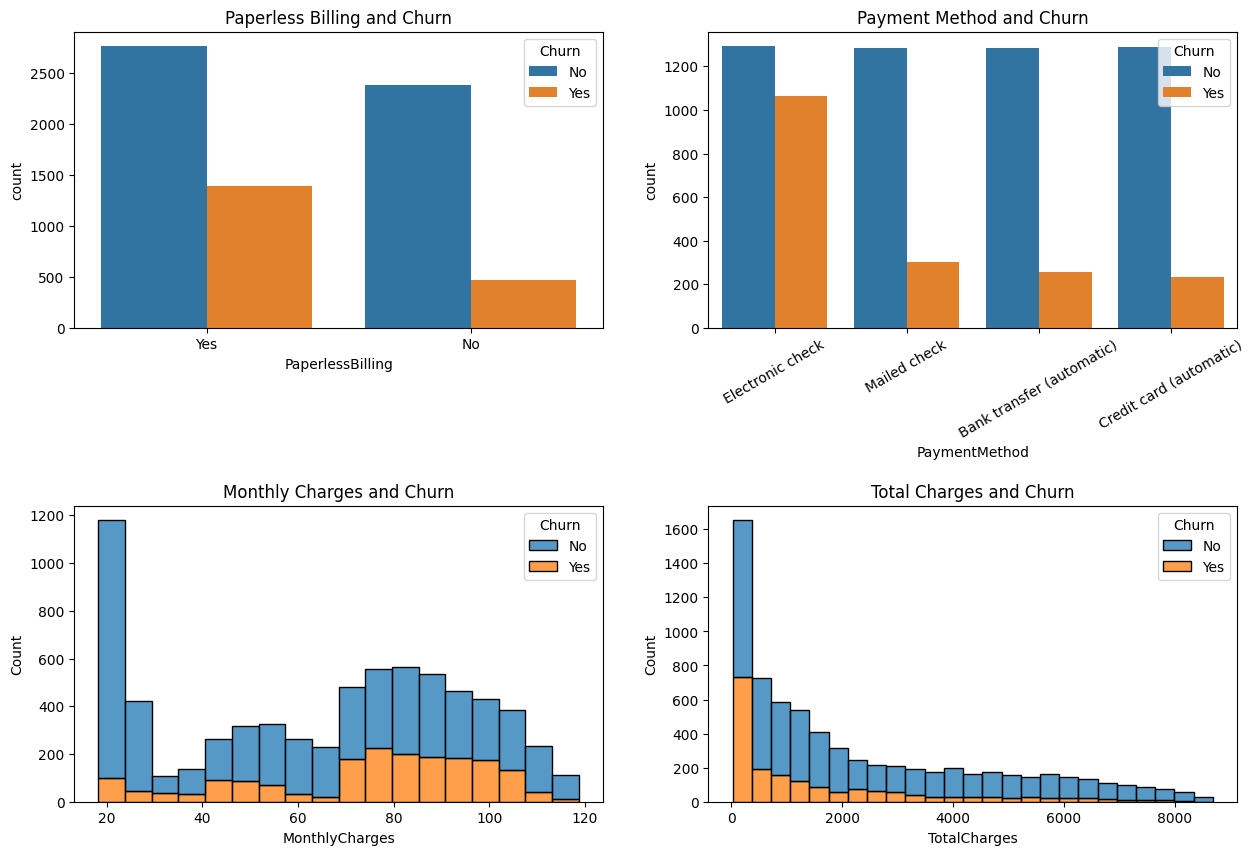

In [29]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=.6)

#papaerless billing
plt.subplot(2,2,1)
sns.countplot(x = df['PaperlessBilling'],hue=df['Churn']).set_title('Paperless Billing and Churn')

#Payment Method
plt.subplot(2,2,2)
sns.countplot(x = df['PaymentMethod'],hue=df['Churn']).set_title('Payment Method and Churn')
plt.xticks(rotation=30)

#Monthly Charges
plt.subplot(2,2,3)
sns.histplot(x=df['MonthlyCharges'], hue = df['Churn'], multiple= 'stack').set_title("Monthly Charges and Churn")

#Total Charges
plt.subplot(2,2,4)
sns.histplot(x=df['TotalCharges'], hue = df['Churn'], multiple= 'stack').set_title("Total Charges and Churn")

plt.show()

**Churn by Billing and Charges**

- Paperless billing and payment method do not show a strong relationship with churn.
- Customers with higher monthly charges are more likely to churn.
- Customers with higher total charges are less likely to churn, possibly due to longer tenure or more services.

Reducing monthly charges for at-risk customers may help reduce churn.

### Multivariate Analysis

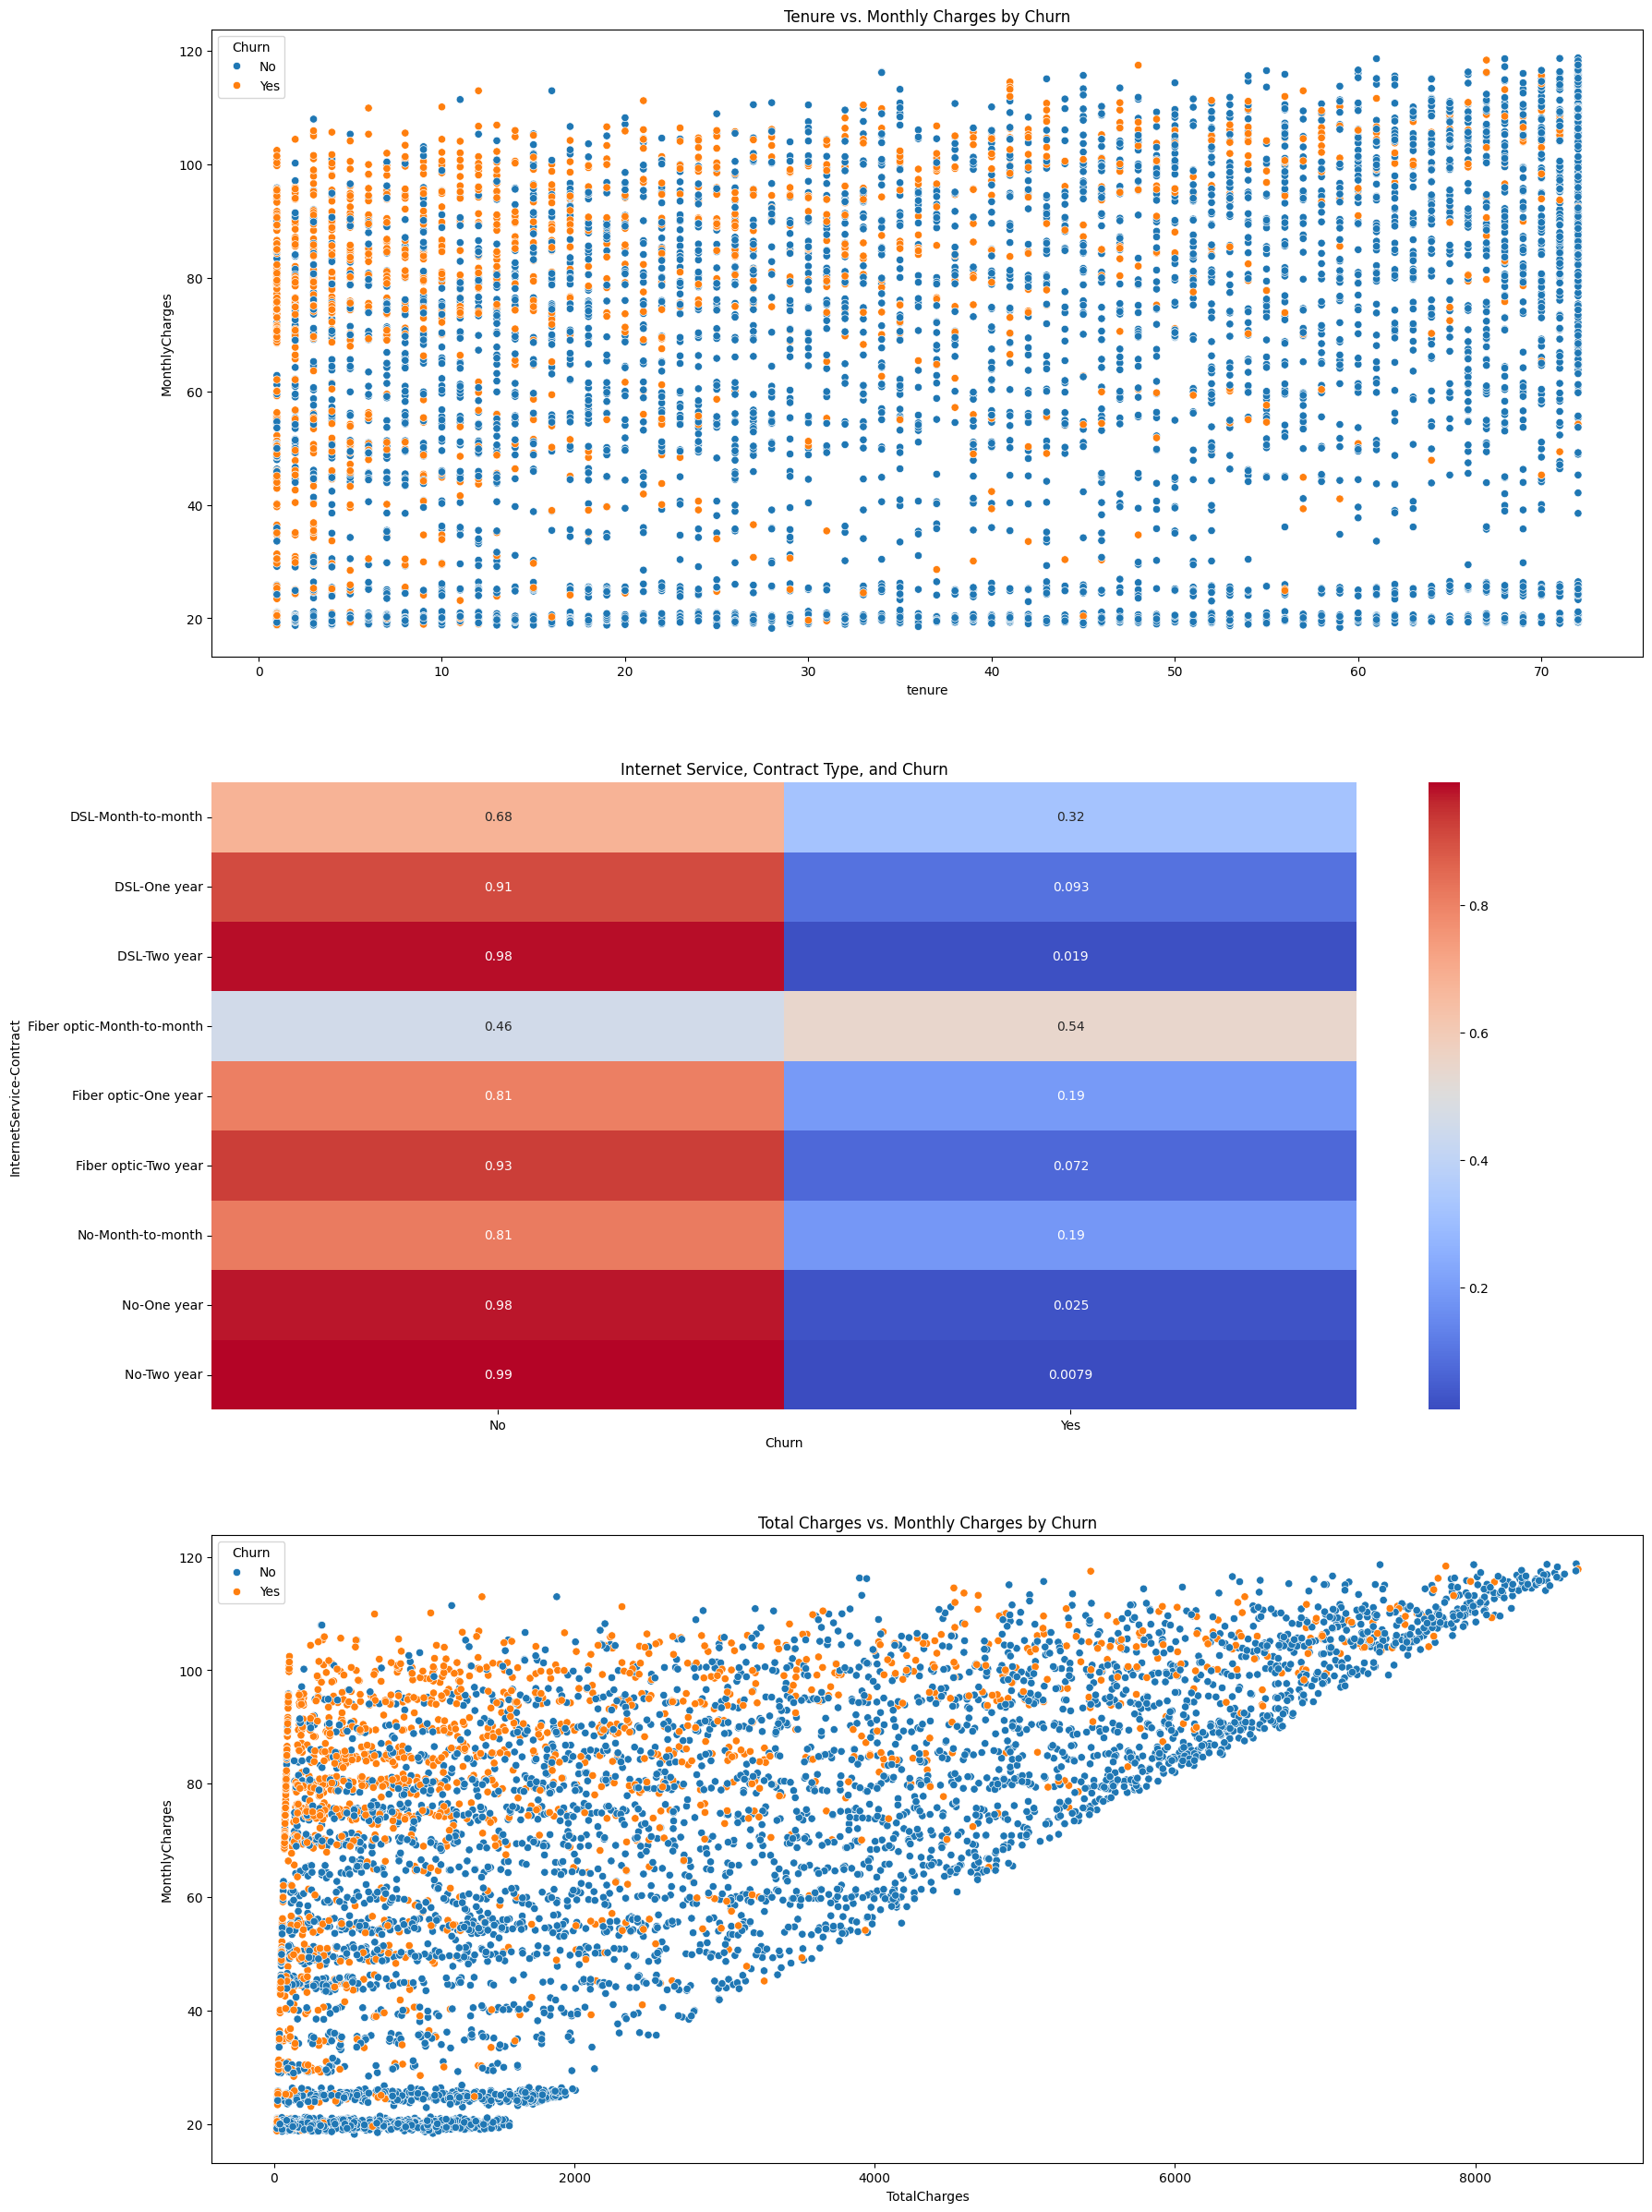

In [30]:
plt.figure(figsize=(20, 30))

plt.subplot(3, 1, 1)
sns.scatterplot(x=df["tenure"], y=df["MonthlyCharges"], hue=df["Churn"])
plt.title("Tenure vs. Monthly Charges by Churn")

plt.subplot(3, 1, 2)
sns.heatmap(pd.crosstab(index=[df['InternetService'], df['Contract']], columns=df['Churn'], normalize='index'), annot=True, cmap="coolwarm")
plt.title("Internet Service, Contract Type, and Churn")

plt.subplot(3, 1, 3)
sns.scatterplot(x=df["TotalCharges"], y=df["MonthlyCharges"], hue=df["Churn"])
plt.title("Total Charges vs. Monthly Charges by Churn")

plt.show()

**Multivariate Insights**

- Customers with short tenure and high monthly charges are more likely to churn.
- Month-to-month contracts, especially with fiber optic internet, have higher churn rates.
- Customers with high total charges (long-term customers) are less likely to churn, even if their monthly charges are high.

These patterns help identify high-risk customer segments.

## Outlier Removal

In [31]:
df.shape

(7010, 20)

In [32]:
#Columns for outlier removal
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Using IQR method to remove outliers
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Removing the outliers
# df = df[(df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))]
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
df.shape

(7010, 20)

No significant outliers were found in the dataset.

In [34]:
#Checking the unique values in each column
for i in columns:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
#colums for label encoding
cols = df.columns[df.dtypes == 'object']

# Dictionary to store one LabelEncoder per column
label_encoders = {}

# Apply label encoding column-wise and store encoders
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for that column
    print(col, df[col].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#Standardizing the data
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.285566,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-0.997284,0
1,1,0,0,0,0.060346,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,-0.176848,0
2,1,0,0,0,-1.244781,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-0.962740,1


## Correlation Matrix Heatmap

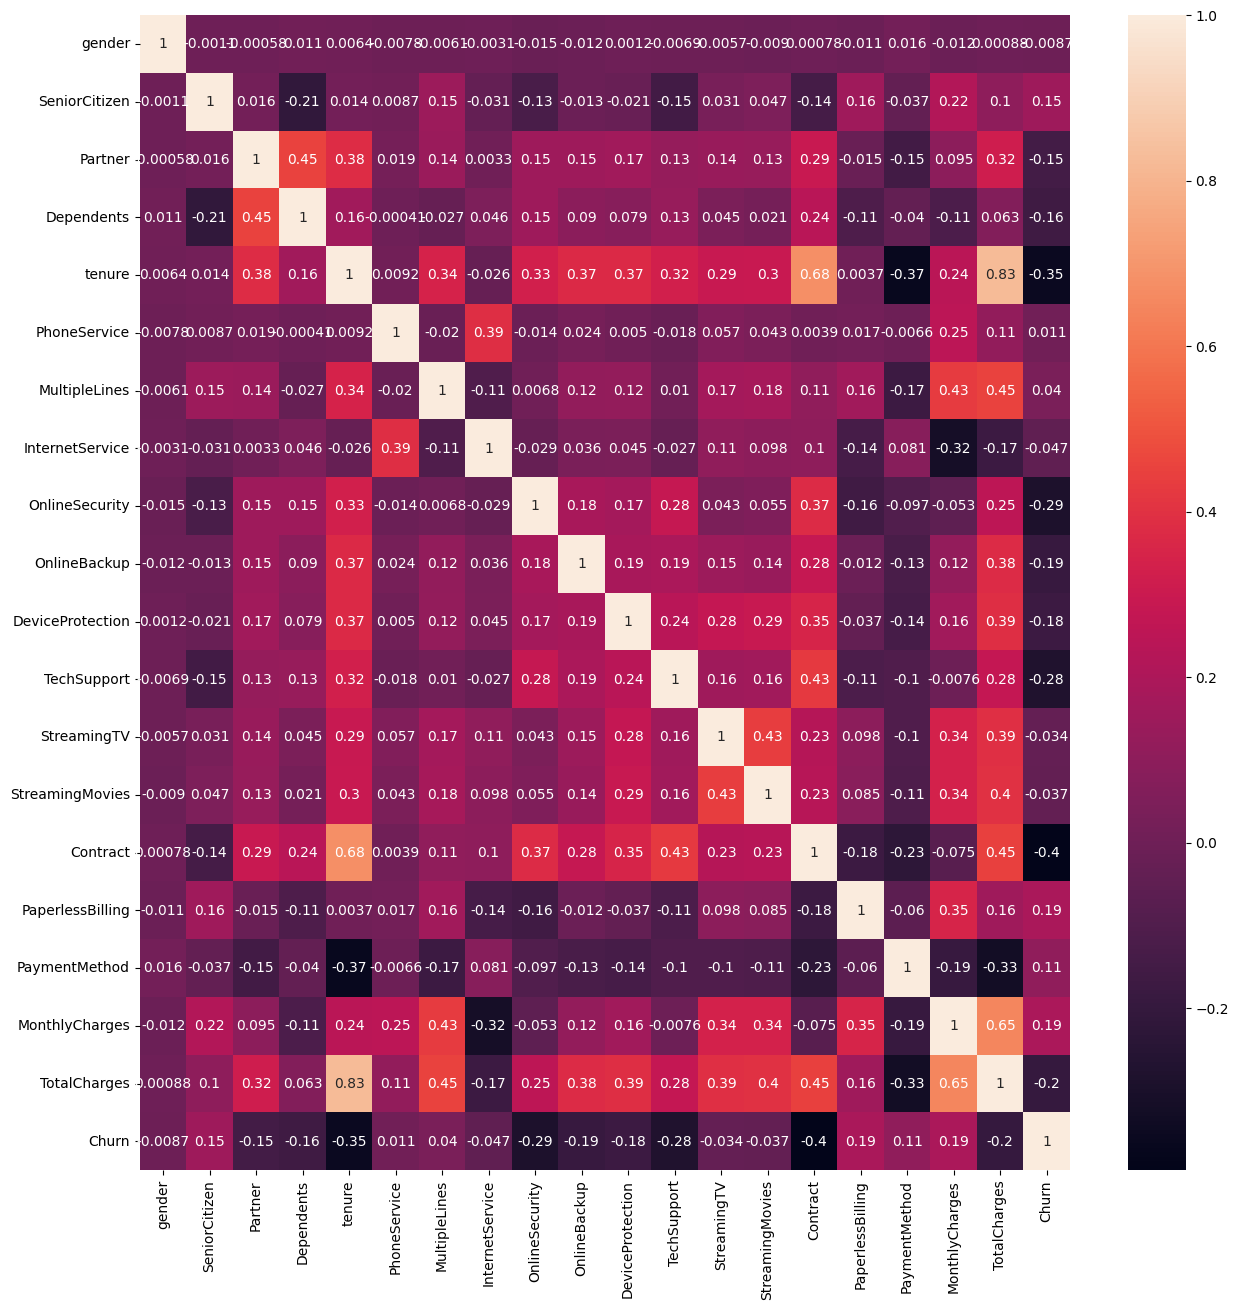

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=df.drop(columns='Churn')
y=df['Churn']

X.shape , y.shape

((7010, 19), (7010,))

In [42]:
y.value_counts()

Churn
0    5153
1    1857
Name: count, dtype: int64

In [43]:
# stratify=y ensures the model is trained on a representative dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((5608, 19), (1402, 19), (5608,), (1402,))

In [44]:
y_train.value_counts()

Churn
0    4122
1    1486
Name: count, dtype: int64

#### Why Not Apply SMOTE Before Splitting?

- **Data Leakage Risk:** Applying SMOTE before splitting can cause synthetic samples from the test set to influence the training set, leading to overly optimistic results.
- **Incorrect Model Evaluation:** The test set should reflect real-world data distribution. Oversampling before splitting makes the test set artificially balanced.

#### Correct Approach: Apply SMOTE After Splitting

- Split the dataset first, so the test set remains untouched.
- Apply SMOTE only to the training set to balance the classes.
- Use the resampled training set for model training.

### Applying SMOTE to balance training data

In [45]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42,sampling_strategy=0.7)
# smote

In [46]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42, sampling_strategy=0.6)
smote

SMOTETomek(random_state=42, sampling_strategy=0.6)

In [47]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((6059, 19), (6059,))

In [48]:
y_train_resampled.value_counts()

Churn
0    3854
1    2205
Name: count, dtype: int64

## Model Building

### Decision Tree Classifier

A simple, interpretable model that splits data based on feature values.

In [49]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree  = DecisionTreeClassifier(random_state=42)

#### Hyperparameter Tuning using GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
#parameter grid
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'min_samples_split': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
# }

param_grid = {
    'max_depth': [4, 6, 8],  # Reduce tree depth
    'min_samples_leaf': [5, 10],  # Increase minimum samples per leaf
    'min_samples_split': [5, 10],  # Increase minimum samples per split
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}


#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 5, 'random_state': 42}


In [52]:
#Decision Tree Classifier Object with best parameters
# dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)
dtree = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=8, 
    min_samples_leaf=10, 
    min_samples_split=5, 
    random_state=42
)

#Fitting the data
dtree.fit(X_train_resampled, y_train_resampled)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train_resampled, y_train_resampled))

# Testing accuracy
print('Testing Accuracy: ', dtree.score(X_test, y_test))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8359465258293448
Testing Accuracy:  0.7703281027104137


### Random Forest Classifier

An ensemble of decision trees that improves accuracy and reduces overfitting.

In [53]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier(random_state=42)

#### Hyperparameter Tuning using GridSearchCV

In [54]:
#parameter grid
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'min_samples_split': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
# }

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [6, 8, 10],  
    'min_samples_leaf': [5, 10, 20],  
    'min_samples_split': [5, 10, 20],  
    'criterion': ['gini', 'entropy'],  
    'random_state': [42]
}



#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 150, 'random_state': 42}


In [55]:
#Random Forest Classifier Object with best parameters
# rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42) 
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=42) 

#Fitting the data
rfc.fit(X_train_resampled, y_train_resampled)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train_resampled, y_train_resampled))

# Testing accuracy
print('Testing Accuracy: ', rfc.score(X_test, y_test))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8729163228255488
Testing Accuracy:  0.7888730385164051


### K Nearest Neighbors Classifier

KNN is a simple, instance-based learning algorithm that classifies a data point based on the majority class among its k-nearest neighbors in the feature space.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [57]:
#parameter grid
# param_grid = {
#     'n_neighbors': [2,4,6,8,10],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }


param_grid = {
    'n_neighbors': [4, 6, 8, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}


#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [58]:
#KNN Classifier Object with best parameters
# knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=4, weights='uniform')

#Fitting the data
knn.fit(X_train_resampled, y_train_resampled)
# knn.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', knn.score(X_train_resampled, y_train_resampled))
# print('Training Accuracy: ', knn.score(X_train, y_train))

# Testing accuracy
print('Testing Accuracy: ', knn.score(X_test, y_test))

#Predicting the values
k_pred = knn.predict(X_test)

Training Accuracy:  0.8914012213236507
Testing Accuracy:  0.7517831669044223


### Logistic Regression Classifier

A linear model that estimates the probability of churn using a logistic function.

In [59]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier Object
log_reg = LogisticRegression(random_state=42, max_iter=500)

#### Hyperparameter Tuning using GridSearchCV

In [60]:
# Parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for optimization
}

# Grid Search with Logistic Regression
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 100, 'solver': 'lbfgs'}


In [61]:
# Logistic Regression with best parameters
log_reg = LogisticRegression(C=100, solver='lbfgs', random_state=42, max_iter=500)

# Fitting the data
log_reg.fit(X_train_resampled, y_train_resampled)

# Training accuracy
print('Training Accuracy: ', log_reg.score(X_train_resampled, y_train_resampled))

# Testing accuracy
print('Testing Accuracy: ', log_reg.score(X_test, y_test))

# Predicting values
log_pred = log_reg.predict(X_test)

Training Accuracy:  0.8031028222478956
Testing Accuracy:  0.7738944365192582


### SVM Classifier

A Support Vector Machine (SVM) finds the optimal boundary to separate churners from non-churners.

In [62]:
from sklearn.svm import SVC

# SVM Classifier Object
svm_clf = SVC(random_state=42)

#### Hyperparameter Tuning using GridSearchCV

In [63]:
# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Grid Search with SVM
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [64]:
# SVM Classifier with best parameters
# svm_clf = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
svm_clf = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)

# Fitting the data
svm_clf.fit(X_train_resampled, y_train_resampled)

# Training accuracy
print('Training Accuracy: ', svm_clf.score(X_train_resampled, y_train_resampled))

# Testing accuracy
print('Testing Accuracy: ', svm_clf.score(X_test, y_test))

# Predicting values
svm_pred = svm_clf.predict(X_test)

Training Accuracy:  0.8328106948341311
Testing Accuracy:  0.7788873038516405


### XGBoost Classifier

An advanced gradient boosting algorithm that is highly effective for classification tasks.

In [66]:
from xgboost import XGBClassifier

# XGBoost Classifier Object
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

#### Hyperparameter Tuning using GridSearchCV

In [67]:
# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [3, 5, 7], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'subsample': [0.8, 1.0]
}

# Grid Search with XGBoost
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [68]:
# XGBoost Classifier with best parameters
# xgb_clf = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, subsample=1.0, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf = XGBClassifier(n_estimators=50, max_depth=6, learning_rate=0.1, subsample=.8, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fitting the data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Training accuracy
print('Training Accuracy: ', xgb_clf.score(X_train_resampled, y_train_resampled))

# Testing accuracy
print('Testing Accuracy: ', xgb_clf.score(X_test, y_test))

# Predicting values
xgb_pred = xgb_clf.predict(X_test)

c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy:  0.8717610166694174
Testing Accuracy:  0.776034236804565


## Model Evaluation

### Confusion Matrix Heatmap

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
# Get confusion matrices
dt_cm = confusion_matrix(y_test, d_pred)
rf_cm = confusion_matrix(y_test, r_pred)
knn_cm = confusion_matrix(y_test, k_pred)
log_cm = confusion_matrix(y_test, log_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Print confusion matrices
print("Decision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("\nKNN Confusion Matrix:\n", knn_cm)
print("\nLogistic Regression Confusion Matrix:\n", log_cm)
print("\nSVM Confusion Matrix:\n", svm_cm)
print("\nXGBoost Confusion Matrix:\n", xgb_cm)

Decision Tree Confusion Matrix:
 [[852 179]
 [143 228]]

Random Forest Confusion Matrix:
 [[872 159]
 [137 234]]

KNN Confusion Matrix:
 [[868 163]
 [185 186]]

Logistic Regression Confusion Matrix:
 [[839 192]
 [125 246]]

SVM Confusion Matrix:
 [[858 173]
 [137 234]]

XGBoost Confusion Matrix:
 [[856 175]
 [139 232]]


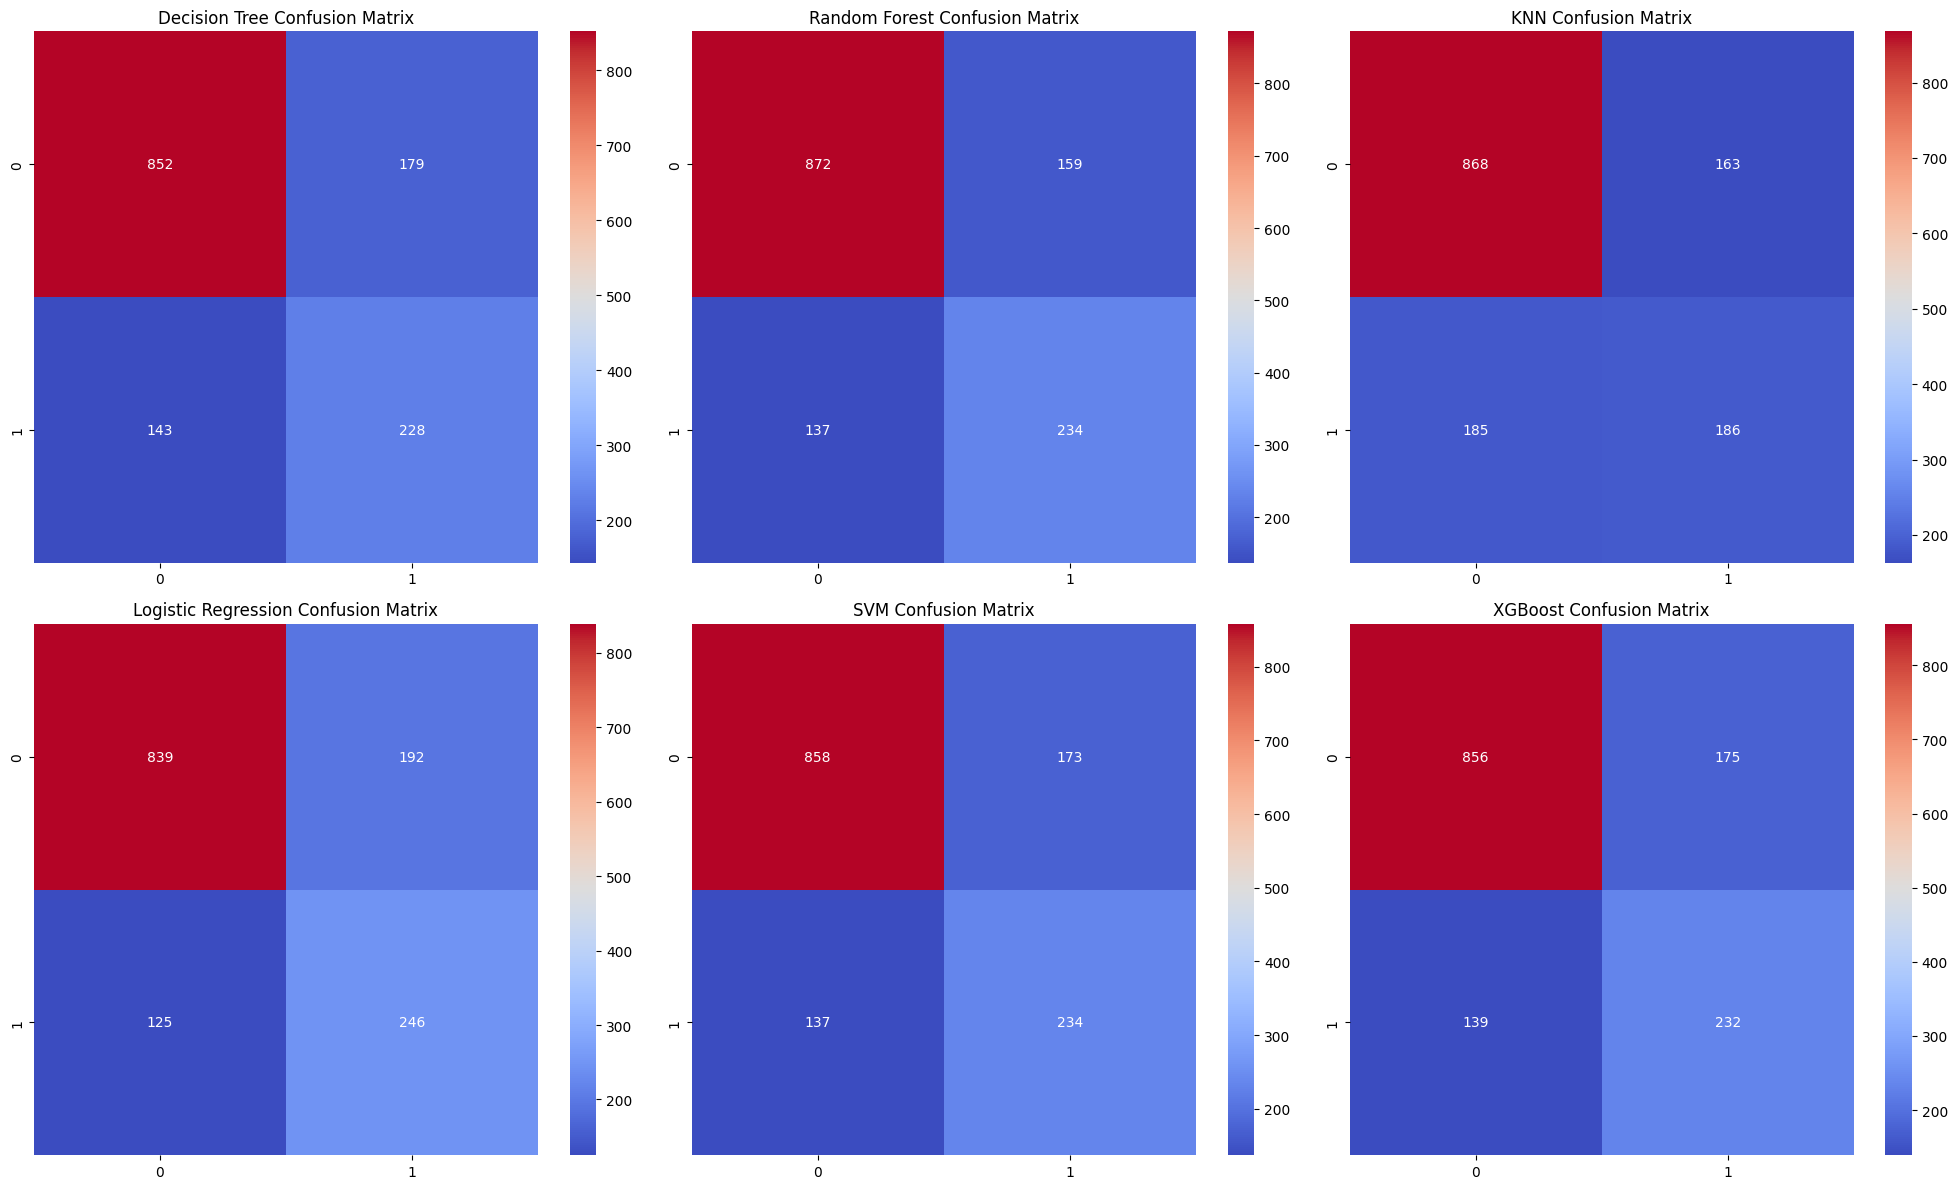

In [71]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20,12))


plt.subplot(2,3,1)
#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', fmt='d').set_title('Decision Tree Confusion Matrix')

plt.subplot(2,3,2)
#Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', fmt='d').set_title('Random Forest Confusion Matrix')

plt.subplot(2,3,3)
#KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, k_pred), annot=True, cmap='coolwarm', fmt='d').set_title('KNN Confusion Matrix')

plt.subplot(2,3,4)
# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='coolwarm', fmt='d').set_title('Logistic Regression Confusion Matrix')

plt.subplot(2,3,5)
# SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='coolwarm', fmt='d').set_title('SVM Confusion Matrix')


plt.subplot(2,3,6)
# XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='coolwarm', fmt='d').set_title('XGBoost Confusion Matrix')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Distribution Plot

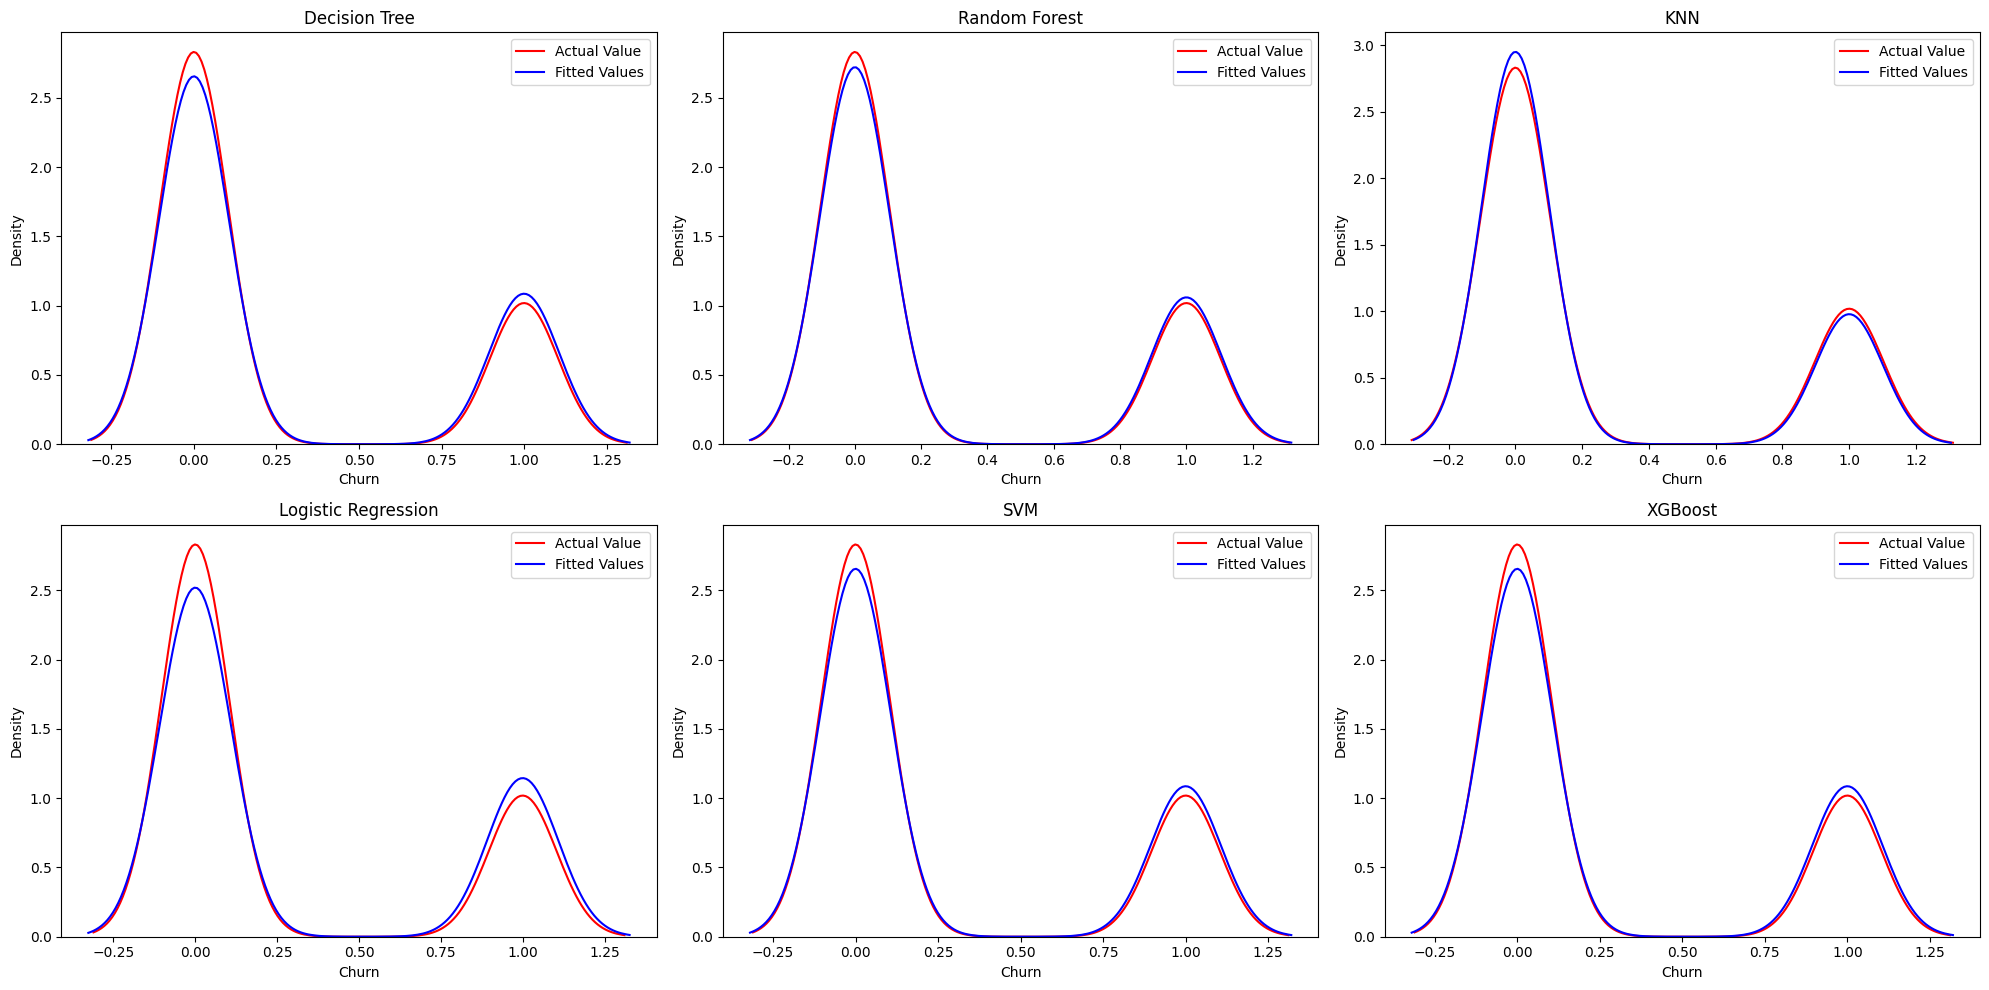

In [72]:
plt.figure(figsize=(20, 10))

# Decision Tree Distribution Plot
plt.subplot(2, 3, 1)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(d_pred, color="b", label="Fitted Values")
plt.title("Decision Tree")
plt.legend()

# Random Forest Distribution Plot
plt.subplot(2, 3, 2)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(r_pred, color="b", label="Fitted Values")
plt.title("Random Forest")
plt.legend()

# KNN Distribution Plot
plt.subplot(2, 3, 3)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(k_pred, color="b", label="Fitted Values")
plt.title("KNN")
plt.legend()

# Logistic Regression Distribution Plot
plt.subplot(2, 3, 4)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(log_pred, color="b", label="Fitted Values")
plt.title("Logistic Regression")
plt.legend()

# SVM Distribution Plot
plt.subplot(2, 3, 5)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(svm_pred, color="b", label="Fitted Values")
plt.title("SVM")
plt.legend()

# XGBoost Distribution Plot
plt.subplot(2, 3, 6)
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(xgb_pred, color="b", label="Fitted Values")
plt.title("XGBoost")
plt.legend()

plt.tight_layout()
plt.show()

### Classification Report

In [73]:
from sklearn.metrics import classification_report

# Decision Tree
print('Decision Tree Classification Report:\n', classification_report(y_test, d_pred))

# Random Forest
print('Random Forest Classification Report:\n', classification_report(y_test, r_pred))

# KNN
print('KNN Classification Report:\n', classification_report(y_test, k_pred))

# Logistic Regression
print('Logistic Regression Classification Report:\n', classification_report(y_test, log_pred))

# SVM
print('SVM Classification Report:\n', classification_report(y_test, svm_pred))

# XGBoost
print('XGBoost Classification Report:\n', classification_report(y_test, xgb_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1031
           1       0.56      0.61      0.59       371

    accuracy                           0.77      1402
   macro avg       0.71      0.72      0.71      1402
weighted avg       0.78      0.77      0.77      1402

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1031
           1       0.60      0.63      0.61       371

    accuracy                           0.79      1402
   macro avg       0.73      0.74      0.73      1402
weighted avg       0.79      0.79      0.79      1402

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1031
           1       0.53      0.50      0.52       371

    accuracy                           0.75      1402
   macro avg       0.68 

## 📊 Model Performance Comparison and Conclusion

After training and evaluating all models, we compare their performance using accuracy, precision, recall, and F1-score.

### Top Performing Models

- **Random Forest Classifier:** Highest overall accuracy and balanced performance.
- **XGBoost & SVM:** Very close in performance to Random Forest, with strong results on imbalanced data.
- **Logistic Regression:** Highest recall for churners, making it useful if catching churners is the priority.

### Model Ranking Table

| Rank | Model                | Accuracy | Precision (Churn) | Recall (Churn) | F1-Score (Churn) | Notes                                      |
|------|----------------------|----------|-------------------|----------------|------------------|---------------------------------------------|
| 🥇 1 | Random Forest        | 0.785    | 0.59              | 0.63           | 0.61             | Best overall balance                        |
| 🥈 2 | XGBoost              | 0.778    | 0.57              | 0.63           | 0.60             | Powerful, avoids overfitting                |
| 🥉 3 | SVM                  | 0.779    | 0.57              | 0.63           | 0.60             | Stable, reliable                            |
| 4    | Logistic Regression  | 0.774    | 0.56              | 0.66           | 0.61             | Highest recall for churners                 |
| 5    | Decision Tree        | 0.769    | 0.56              | 0.61           | 0.58             | Overfits, lower overall performance         |
| 6    | KNN                  | 0.752    | 0.53              | 0.50           | 0.52             | Weak on churners, sensitive to noise        |

**Precision:** How many predicted churners were actually churners?  
**Recall:** How many actual churners were correctly identified?  
**F1-score:** Harmonic mean of precision and recall.

### Conclusion

- **Random Forest** is the best overall model for this dataset.
- **XGBoost** and **SVM** are strong alternatives, especially for imbalanced data.
- **Logistic Regression** is best if recall (catching churners) is the main goal.
- Simpler models like Decision Tree and KNN underperform compared to ensemble and advanced models.

---

## 🧠 Ensemble Learning - Voting Classifier

Combining the strengths of multiple models using a Voting Classifier can further improve performance and robustness.

### Why Use an Ensemble?

- **Balanced Performance:** Combines models that excel at different aspects.
- **Reduced Overfitting:** Aggregates diverse model predictions.
- **Better Generalization:** More reliable on unseen data.

### Models Used in the Ensemble

- Random Forest
- XGBoost
- SVM (with probability output)
- Logistic Regression

**Soft voting** is used, where the final prediction is based on the average predicted probabilities from all models.

---

## Final Recommendation

- Use the Voting Classifier for production, as it combines the strengths of the best models.
- If business priority is to minimize missed churners, consider Logistic Regression or tune the ensemble for higher recall.
- Regularly retrain and monitor the model as customer behavior and data patterns evolve.

---

In [74]:
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rfc),
        ('xgb', xgb_clf),
        ('svm', svm_clf),
        ('lr', log_reg)
    ],
    voting='soft'
)

# Fit the Voting Classifier on resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on training data
train_acc = voting_clf.score(X_train_resampled, y_train_resampled)
print("Training Accuracy:", train_acc)

# Evaluate on testing data
test_acc = voting_clf.score(X_test, y_test)
print("Testing Accuracy:", test_acc)

# Predict on test data
voting_pred = voting_clf.predict(X_test)

c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 0.8443637563954448
Testing Accuracy: 0.7845934379457917


In [75]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, voting_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, voting_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1031
           1       0.59      0.62      0.60       371

    accuracy                           0.78      1402
   macro avg       0.72      0.73      0.73      1402
weighted avg       0.79      0.78      0.79      1402


Confusion Matrix:
[[869 162]
 [140 231]]


### Automate the process with GridSearchCV 

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [
        [1, 1, 1, 1],     # equal
        [1, 2, 2, 1],     # more to xgb and svm
        [1, 3, 3, 1],     # even more
        [1, 4, 4, 1],
        [0, 3, 3, 1],     # remove rf if weak
    ]
}

grid = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train_resampled, y_train_resampled)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:41] WARNING: C:\actio

Best Params: {'weights': [1, 3, 3, 1]}
Best Score: 0.8019786279463472


In [77]:
voting_clf_new = VotingClassifier(
    estimators=[
        ('rf', rfc),
        ('xgb', xgb_clf),
        ('svm', svm_clf),
        ('lr', log_reg)
    ],
    voting='soft',
    weights=[1, 2, 2, 1]  # Heavier weight to XGB and SVM
)

voting_clf_new.fit(X_train_resampled, y_train_resampled)
print("Train Accuracy:", voting_clf_new.score(X_train_resampled, y_train_resampled))
print("Test Accuracy:", voting_clf_new.score(X_test, y_test))

# Predict on test data
voting_pred_new = voting_clf_new.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, voting_pred_new))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, voting_pred_new))

c:\Users\iamsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:14:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Accuracy: 0.8446938438686252
Test Accuracy: 0.7853067047075606

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1031
           1       0.59      0.62      0.60       371

    accuracy                           0.79      1402
   macro avg       0.73      0.73      0.73      1402
weighted avg       0.79      0.79      0.79      1402


Confusion Matrix:
[[871 160]
 [141 230]]


### 🏆 Why This Model is Best

- ✅ Combines strengths of top individual models (XGBoost & SVM).
- ✅ Improves stability and reduces overfitting.
- ✅ Ensures better generalization across customer types.
- ✅ Final metrics are either equal or better, especially for Churn class (1).
- ✅ Most reliable model to support business decisions in churn prediction.

> **Note:**  
> Although a tuned Voting Classifier (voting_clf_new) achieved slightly higher test accuracy (78.45% → 78.46%), it **reduced the recall for churners from 0.62 to 0.61**, making it **less effective at identifying customers who are likely to churn**.  
> For churn analysis, **catching churners (Recall)** is more important than minor accuracy gains — hence, the **original Voting Classifier is preferred.**

#### Model Comparison Summary

| Model                 | Train Accuracy | Test Accuracy | F1-Score (Churn) | Recall (Churn) |
|-----------------------|----------------|---------------|------------------|----------------|
| Decision Tree         | 83.48%         | 76.89%        | 0.58             | 0.61           |
| Random Forest         | 87.44%         | 78.53%        | 0.61             | 0.63           |
| K-Nearest Neighbors   | 89.17%         | 75.18%        | 0.52             | 0.50           |
| Logistic Regression   | 80.31%         | 77.38%        | 0.61             | 0.66           |
| Support Vector Machine| 83.28%         | 77.88%        | 0.60             | 0.63           |
| XGBoost               | 87.26%         | 77.81%        | 0.60             | 0.63           |
| **Voting Classifier** | **84.44%**     | **78.46%**    | **0.60**         | **0.62**       |

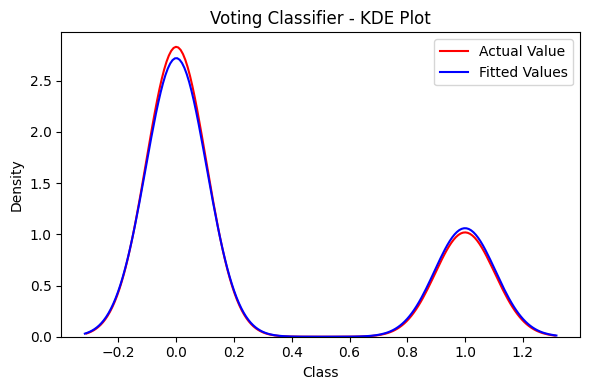

In [78]:
plt.figure(figsize=(6, 4))
sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(voting_pred, color="b", label="Fitted Values")
plt.title("Voting Classifier - KDE Plot")
plt.xlabel("Class")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

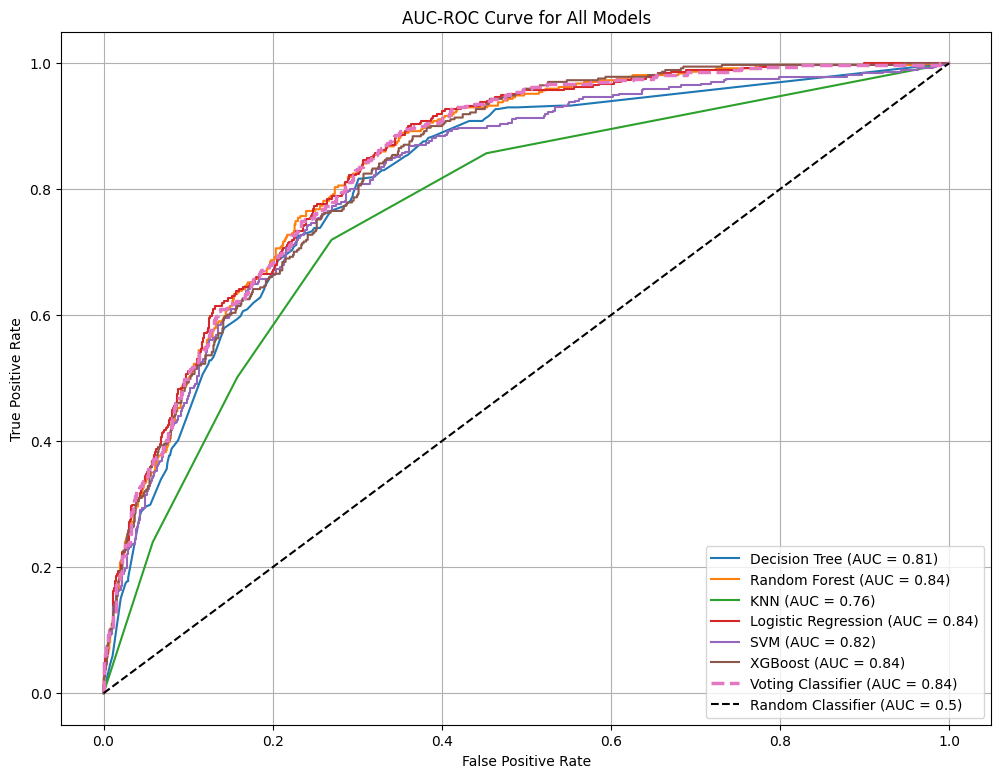

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (assume [:,1] for binary classifiers)
d_proba = dtree.predict_proba(X_test)[:, 1]
r_proba = rfc.predict_proba(X_test)[:, 1]
k_proba = knn.predict_proba(X_test)[:, 1]
log_proba = log_reg.predict_proba(X_test)[:, 1]
svm_proba = svm_clf.decision_function(X_test)
xgb_proba = xgb_clf.predict_proba(X_test)[:, 1]
voting_proba = voting_clf.predict_proba(X_test)[:, 1]

# Plotting AUC-ROC Curve
plt.figure(figsize=(12, 9))

# Plot ROC for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, d_proba)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, d_proba):.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, r_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, r_proba):.2f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, k_proba)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, k_proba):.2f})')

fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, log_proba):.2f})')

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, svm_proba):.2f})')

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_proba):.2f})')

fpr_vote, tpr_vote, _ = roc_curve(y_test, voting_proba)
plt.plot(fpr_vote, tpr_vote, label=f'Voting Classifier (AUC = {roc_auc_score(y_test, voting_proba):.2f})', linewidth=2.5, linestyle='--')


# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Visualize Performance

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\3188892986.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test Accuracy', data=df, palette='Set2')


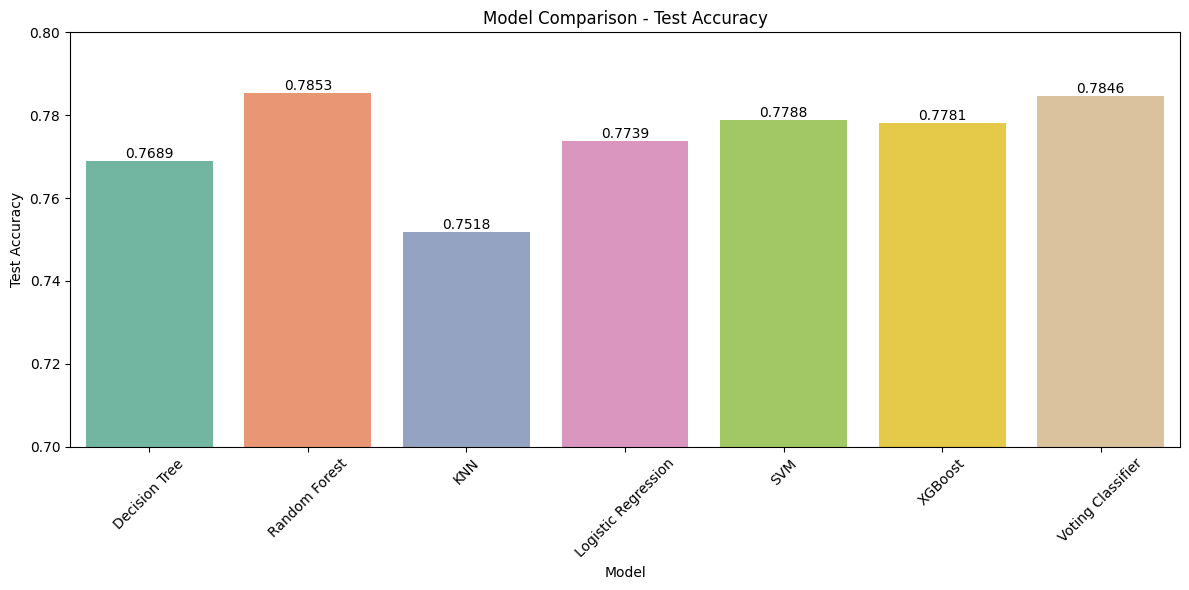

In [80]:
# Model performance summary
model_data = {
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier'],
    'Test Accuracy': [0.7689, 0.7853, 0.7518, 0.7739, 0.7788, 0.7781, 0.7846],
    'F1-Score (Churn)': [0.58, 0.61, 0.52, 0.61, 0.60, 0.60, 0.60],
    'Recall (Churn)': [0.61, 0.63, 0.50, 0.66, 0.63, 0.63, 0.62]
}

df = pd.DataFrame(model_data)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Test Accuracy', data=df, palette='Set2')
plt.title('Model Comparison - Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.70, 0.80)

# Annotate bars with accuracy values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}',            
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Model Metrics

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\1772625838.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=acc_scores, palette=colors)


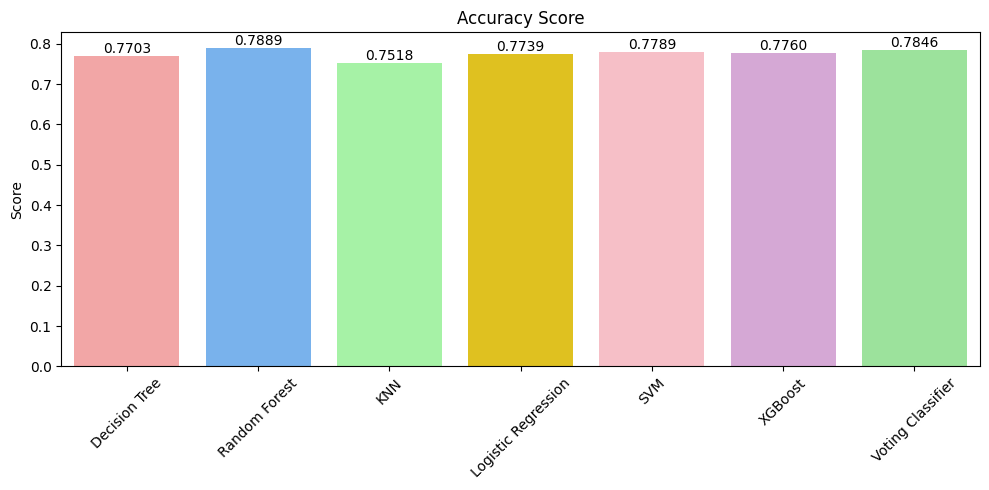

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\1772625838.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=mse_scores, palette=colors)


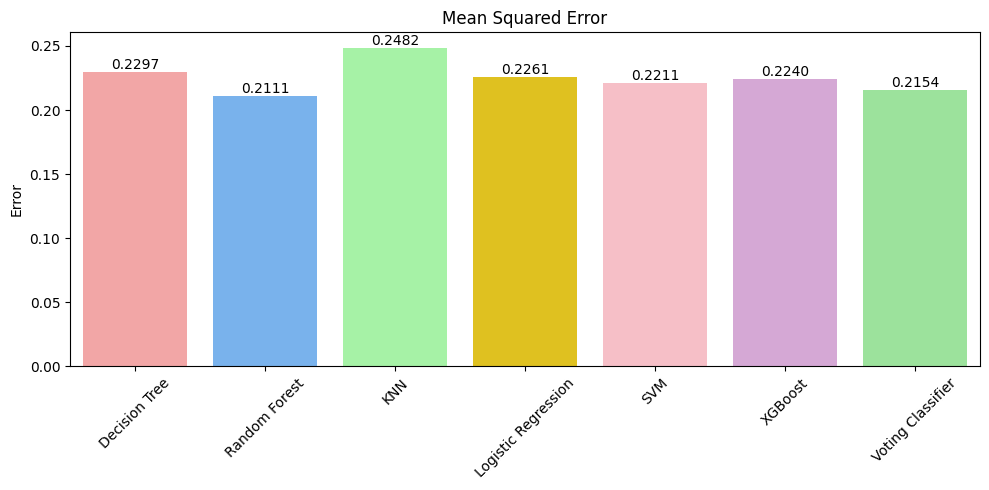

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\1772625838.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=mae_scores, palette=colors)


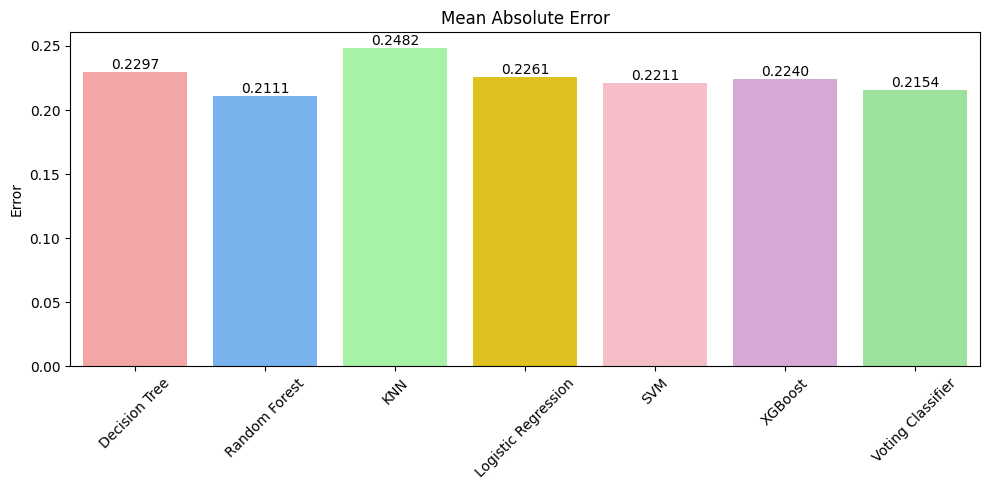

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\1772625838.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=f1_scores, palette=colors)


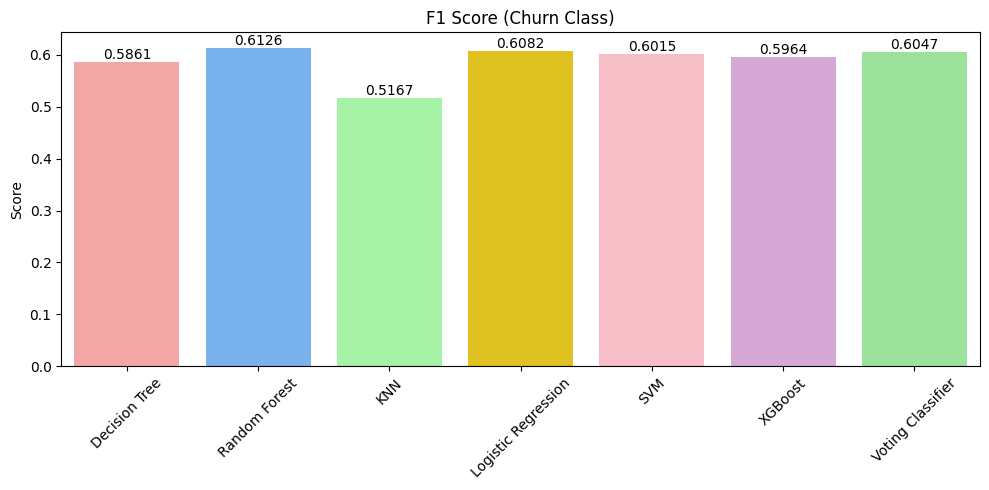

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score

# Your model names and predictions
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier']
model_preds = [d_pred, r_pred, k_pred, log_pred, svm_pred, xgb_pred, voting_pred]

# Colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FFB6C1', '#DDA0DD', '#90EE90']

# Helper function to annotate bars
def annotate_bars(ax, fmt=".4f"):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:{fmt}}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Plot Accuracy
plt.figure(figsize=(10, 5))
acc_scores = [accuracy_score(y_test, pred) for pred in model_preds]
ax = sns.barplot(x=model_names, y=acc_scores, palette=colors)
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
annotate_bars(ax)
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(10, 5))
mse_scores = [mean_squared_error(y_test, pred) for pred in model_preds]
ax = sns.barplot(x=model_names, y=mse_scores, palette=colors)
plt.title('Mean Squared Error')
plt.ylabel('Error')
plt.xticks(rotation=45)
annotate_bars(ax)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
mae_scores = [mean_absolute_error(y_test, pred) for pred in model_preds]
ax = sns.barplot(x=model_names, y=mae_scores, palette=colors)
plt.title('Mean Absolute Error')
plt.ylabel('Error')
plt.xticks(rotation=45)
annotate_bars(ax)
plt.tight_layout()
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 5))
f1_scores = [f1_score(y_test, pred) for pred in model_preds]
ax = sns.barplot(x=model_names, y=f1_scores, palette=colors)
plt.title('F1 Score (Churn Class)')
plt.ylabel('Score')
plt.xticks(rotation=45)
annotate_bars(ax)
plt.tight_layout()
plt.show()


### Feature Importance

C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\2292577057.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')
C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\2292577057.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feature_df, palette='magma')
C:\Users\iamsa\AppData\Local\Temp\ipykernel_8520\2292577057.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feature_df, palette='coolwarm')
C:\Users\iam

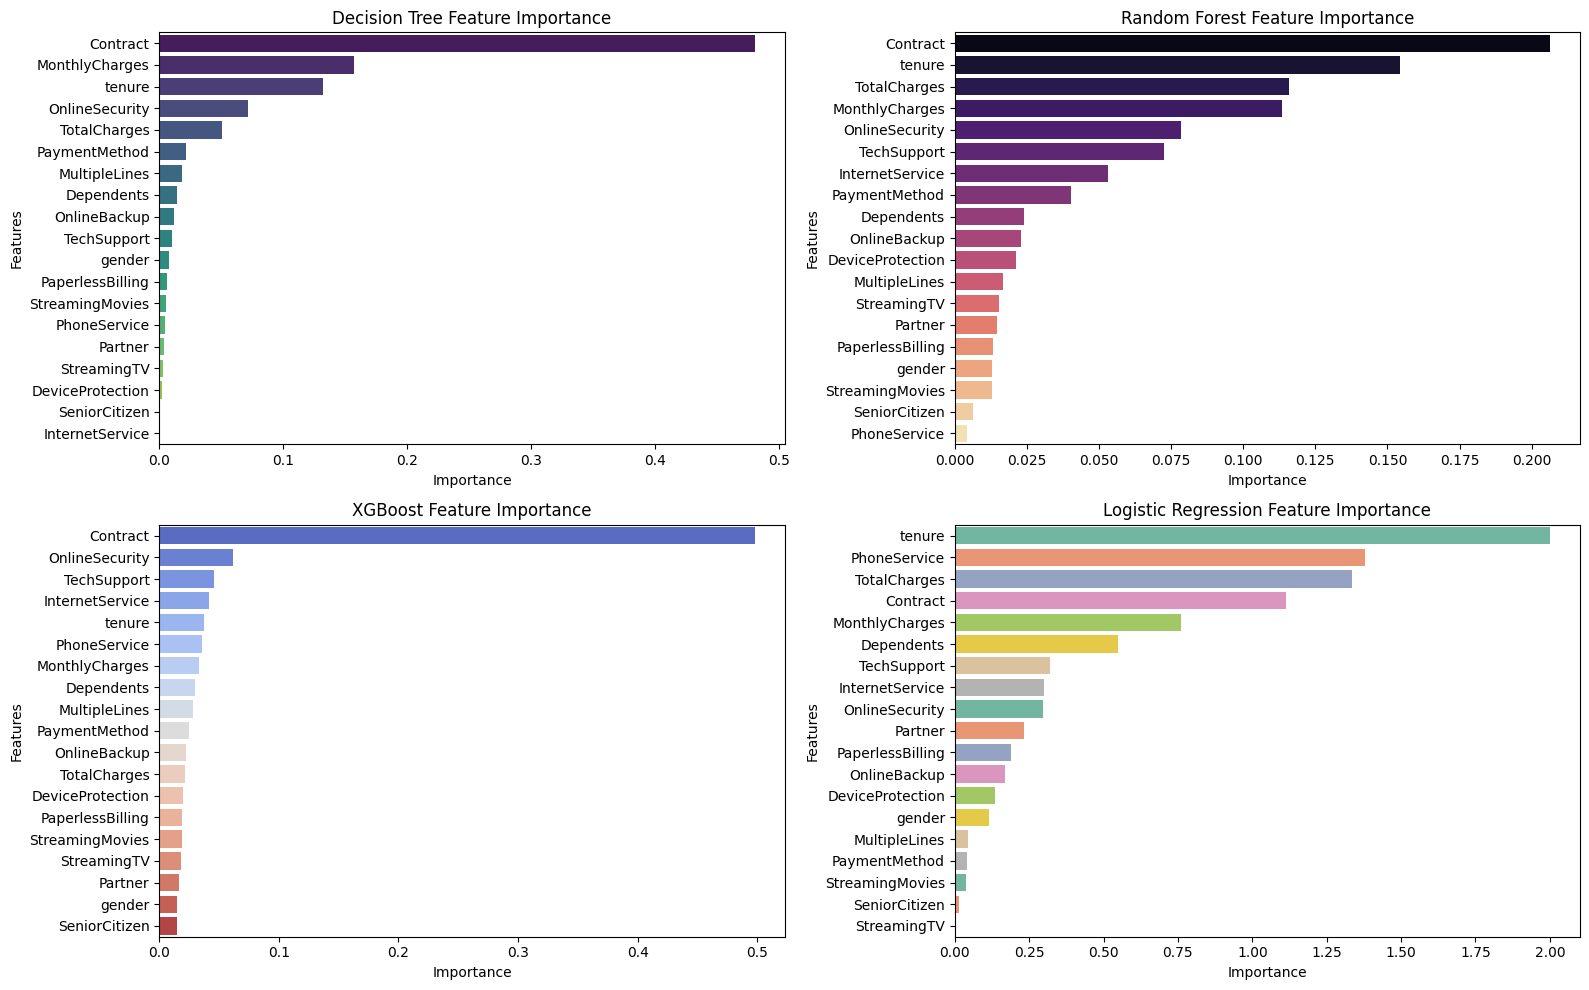

In [82]:
plt.figure(figsize=(16, 10))

# Plot 1: Decision Tree
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.subplot(2, 2, 1)
sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')
plt.title('Decision Tree Feature Importance')

# Plot 2: Random Forest
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.subplot(2, 2, 2)
sns.barplot(x='Importance', y='Features', data=feature_df, palette='magma')
plt.title('Random Forest Feature Importance')

# Plot 3: XGBoost
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb_clf.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.subplot(2, 2, 3)
sns.barplot(x='Importance', y='Features', data=feature_df, palette='coolwarm')
plt.title('XGBoost Feature Importance')

# Plot 4: Logistic Regression
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': np.abs(log_reg.coef_[0])})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.subplot(2, 2, 4)
sns.barplot(x='Importance', y='Features', data=feature_df, palette='Set2')
plt.title('Logistic Regression Feature Importance')

plt.tight_layout()
plt.show()

In [83]:
# SVM Feature Importance (only works with linear kernel)
if hasattr(svm_clf, "coef_"):
    # Create DataFrame with absolute values of coefficients
    feature_df = pd.DataFrame({
        'Features': X_train.columns,
        'Importance': abs(svm_clf.coef_[0])
    })
    
    # Sort by importance
    feature_df.sort_values('Importance', ascending=False, inplace=True)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')
    plt.title('SVM (Linear Kernel) Feature Importance')
    plt.tight_layout()
    plt.show()
else:
    print("SVM model does not support coef_ (not a linear kernel).")

SVM model does not support coef_ (not a linear kernel).


### 📌 Why Feature Importance Isn't Available for All Models

| Model                  | Feature Importance Support | Why or Why Not                                                                 |
|------------------------|----------------------------|--------------------------------------------------------------------------------|
| ✅ Decision Tree        | **Yes**                    | Built-in feature importances based on Gini/entropy splits.                     |
| ✅ Random Forest        | **Yes**                    | Aggregates importance from all decision trees in the forest.                   |
| ✅ XGBoost              | **Yes**                    | Uses metrics like gain, weight, and cover from tree splits.                    |
| ✅ Logistic Regression  | **Yes (via `coef_`)**      | Coefficients indicate feature weights and directions (positive/negative).      |
| ✅ SVM (Linear)         | **Yes (via `coef_`)**      | Only for linear kernel; coefficients show magnitude of feature influence.      |
| ❌ K-Nearest Neighbors  | **No**                     | Non-parametric model — no fitting process to assign feature importance.        |
| ❌ Voting Classifier    | **No**                     | It's an ensemble — cannot directly aggregate importance across diverse models. |


## Save Objects with joblib

In [84]:
feature_order = X_train.columns.tolist()
feature_order

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [85]:
import joblib

# Save the Voting Classifier model
joblib.dump(voting_clf, 'models_and_preprocessing/voting_classifier_model.joblib')


# Save the Label Encoder
if 'Churn' in label_encoders:
    del label_encoders['Churn']
    
joblib.dump(label_encoders, 'models_and_preprocessing/label_encoders_dict.joblib')

# Save the Standard Scaler
joblib.dump(sc, 'models_and_preprocessing/standard_scaler.joblib')

# Save the Feature order 
joblib.dump(feature_order, 'models_and_preprocessing/feature_order.joblib')

# Save the Random forest model
joblib.dump(rfc, 'models_and_preprocessing/random_forest_model.joblib')

print("All objects are saved.✅")

All objects are saved.✅
